In [4]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
import re

# Read data

In [6]:
os.getcwd()

'C:\\Users\\vnarv\\PycharmProjects\\scoring_SDA'

In [12]:

# folder path
dir_path = "C://Users//vnarv//PycharmProjects//scoring_SDA/data/"
#dir_path = "/home/onyxia/scoring_SDA/"

# list to store files
res = []

# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        res.append(path)
print(res)

['2020_US_County_Level_Presidential_Results.csv', 'Education.xls', 'PopulationEstimates.xls', 'PovertyEstimates.xls', 'Unemployment.xls', 'US_County_Level_Presidential_Results_08-16.csv']


# Explore files 

In [66]:
def check_nan(data):

    nb_lines = data.shape[0]
    nb_columns = data.shape[1]

    print("=== Checking NAN")
    nb_nan = data.isna().sum() / nb_lines
    part_nan = nb_nan[nb_nan>0]

    if not part_nan.empty:
        part_nan = part_nan.sort_values(ascending=False)
        nb_cols_nan = len(part_nan.keys())
        print(f"... nb of columns with NAN {nb_cols_nan} out of {nb_columns}")
        for index, value in part_nan.items():
            print(f"{index}... {value:.2%}")
            
    if df.empty:
        print("None NAN values found")

def check_duplicates(data, keys):
    df_dup = data[data.duplicated(subset=keys, keep=False)]
    display(df_dup.head())

In [14]:
for file in res:
    if file.endswith(".csv"):
        t = pd.read_csv(dir_path + file)
        print(f"\n========== File name {file}\n")
        display(t.head())
        print(t.columns)
        check_nan(t)

    elif file.endswith(".xls"):
        # read file
        with open(dir_path + file, mode="rb") as excel_file:
            _excel_file = pd.read_excel(excel_file,)
        print(f"\n========== File name {file}\n")
        print(_excel_file.columns[0])
        _excel_file.set_index(_excel_file.columns[0], inplace=True)
        # drop nan
        _excel_file = _excel_file.dropna(how="all")
        # set header
        header_row = _excel_file.iloc[0]
        df = pd.DataFrame(_excel_file.values[1:], columns=header_row)
        check_nan(df)
       
            
        print("======== Check NAN")
        

    else:
        print("Check files in data folder")


========== File name 2020_US_County_Level_Presidential_Results.csv



state_name  county_fips     county_name  votes_gop  votes_dem  total_votes  \
0    Alabama         1001  Autauga County      19838       7503        27770   
1    Alabama         1003  Baldwin County      83544      24578       109679   
2    Alabama         1005  Barbour County       5622       4816        10518   
3    Alabama         1007     Bibb County       7525       1986         9595   
4    Alabama         1009   Blount County      24711       2640        27588   

    diff   per_gop   per_dem  per_point_diff  
0  12335  0.714368  0.270184        0.444184  
1  58966  0.761714  0.224090        0.537623  
2    806  0.534512  0.457882        0.076631  
3   5539  0.784263  0.206983        0.577280  
4  22071  0.895716  0.095694        0.800022

Index(['state_name', 'county_fips', 'county_name', 'votes_gop', 'votes_dem',
       'total_votes', 'diff', 'per_gop', 'per_dem', 'per_point_diff'],
      dtype='object')
=== Check NAN

========== File name Education.xls

Educational attainment for adults age 25 and older for the U.S., States, and counties, 1970-2019
=== Check NAN
... nb of columns with NAN 44 out of 46
Less than a high school diploma, 1970... 2.95%
High school diploma only, 1970... 2.95%
Some college (1-3 years), 1970... 2.95%
Four years of college or higher, 1970... 2.95%
Percent of adults with less than a high school diploma, 1970... 2.95%
Percent of adults with a high school diploma only, 1970... 2.95%
Percent of adults completing some college (1-3 years), 1970... 2.95%
Percent of adults completing four years of college or higher, 1970... 2.95%
2003 Rural-urban Continuum Code... 1.89%
2013 Rural-urban Continuum Code... 1.89%
2013 Urban Influence Code... 1.89%
2003 Urban Influence Code... 1.89%
Percent of adults with

FIPS Code State       Area name 2003 Rural-urban Continuum Code  \
0            US   United States                             NaN   
1            AL         Alabama                             NaN   
2            AL  Autauga County                               2   
3            AL  Baldwin County                               4   
4            AL  Barbour County                               6   

FIPS Code 2003 Urban Influence Code 2013 Rural-urban Continuum Code  \
0                               NaN                             NaN   
1                               NaN                             NaN   
2                                 2                               2   
3                                 5                               3   
4                                 6                               6   

FIPS Code 2013 Urban Influence Code Less than a high school diploma, 1970  \
0                               NaN                              52373312   
1                               NaN                               1062306   
2                                 2                                  6611   
3                                 2                                 18726   
4                                 6                                  8120   

FIPS Code High school diploma only, 1970 Some college (1-3 years), 1970  \
0                               34158051                       11650730   
1                                 468269                         136287   
2                                   3757                            933   
3                                   8426                           2334   
4                                   2242                            581   

FIPS Code Four years of college or higher, 1970  ...  \
0                                      11717266  ...   
1                                        141936  ...   
2                                           767  ...   
3                                          2038  ...   
4                                           861  ...   

FIPS Code Percent of adults completing some college or associate's degree, 2000  \
0                                                       27.4                      
1                                                       25.9                      
2                                                       26.9                      
3                                                       29.3                      
4                                                       21.3                      

FIPS Code Percent of adults with a bachelor's degree or higher, 2000  \
0                                                       24.4           
1                                                         19           
2                                                         18           
3                                                       23.1           
4                                                       10.9           

FIPS Code Less than a high school diploma, 2015-19  \
0                                         26472261   
1                                           458922   
2                                             4291   
3                                            13893   
4                                             4812   

FIPS Code High school diploma only, 2015-19  \
0                                  59472748   
1                                   1022839   
2                                     12551   
3                                     41797   
4                                      6396   

FIPS Code Some college or associate's degree, 2015-19  \
0                                            63756905   
1                                              993344   
2                                               10596   
3                                               47274   
4                                                4676   

FIPS Code Bachelor's degree or highe

======== Check NAN

========== File name PopulationEstimates.xls

Population estimates for the U.S., States, and counties, 2010-19 (see the second tab in this workbook for variable name descriptions)
=== Check NAN
... nb of columns with NAN 150 out of 164
Economic_typology_2015... 4.00%
R_NET_MIG_2019... 2.44%
R_death_2014... 2.44%
R_NATURAL_INC_2017... 2.44%
R_NATURAL_INC_2016... 2.44%
R_NATURAL_INC_2015... 2.44%
R_NATURAL_INC_2014... 2.44%
R_NATURAL_INC_2013... 2.44%
R_NATURAL_INC_2012... 2.44%
R_death_2019... 2.44%
R_death_2018... 2.44%
R_death_2017... 2.44%
R_death_2016... 2.44%
R_death_2015... 2.44%
R_death_2013... 2.44%
R_NATURAL_INC_2019... 2.44%
R_death_2012... 2.44%
R_death_2011... 2.44%
R_birth_2019... 2.44%
R_birth_2018... 2.44%
R_birth_2017... 2.44%
R_birth_2016... 2.44%
R_birth_2015... 2.44%
R_birth_2014... 2.44%
R_birth_2013... 2.44%
R_birth_2012... 2.44%
R_birth_2011... 2.44%
R_NATURAL_INC_2018... 2.44%
R_NATURAL_INC_2011... 2.44%
R_INTERNATIONAL_MIG_2011... 2.44%
R_DOME

FIPStxt State       Area_Name Rural-urban_Continuum Code_2003  \
0          US   United States                             NaN   
1          AL         Alabama                             NaN   
2          AL  Autauga County                               2   
3          AL  Baldwin County                               4   
4          AL  Barbour County                               6   

FIPStxt Rural-urban_Continuum Code_2013 Urban_Influence_Code_2003  \
0                                   NaN                       NaN   
1                                   NaN                       NaN   
2                                     2                         2   
3                                     3                         5   
4                                     6                         6   

FIPStxt Urban_Influence_Code_2013 Economic_typology_2015 CENSUS_2010_POP  \
0                             NaN                    NaN       308745538   
1                             NaN                    NaN         4779736   
2                               2                      0           54571   
3                               2                      5          182265   
4                               6                      3           27457   

FIPStxt ESTIMATES_BASE_2010 POP_ESTIMATE_2010  ... R_DOMESTIC_MIG_2019  \
0                 308758105         309321666  ...                 NaN   
1                   4780125           4785437  ...            1.917501   
2                     54597             54773  ...             4.84731   
3                    182265            183112  ...           24.017829   
4                     27455             27327  ...           -5.690302   

FIPStxt R_NET_MIG_2011 R_NET_MIG_2012 R_NET_MIG_2013 R_NET_MIG_2014  \
0                  NaN            NaN            NaN            NaN   
1             0.578434       1.186314       1.522549       0.563489   
2             6.018182      -6.226119      -3.902226       1.970443   
3             16.64187      17.488579      22.751474      20.184334   
4             0.292676      -6.897817      -8.132185      -5.140431   

FIPStxt R_NET_MIG_2015 R_NET_MIG_2016 R_NET_MIG_2017 R_NET_MIG_2018  \
0                  NaN            NaN            NaN            NaN   
1             0.626357       0.745172       1.090366       1.773786   
2            -1.712875       4.777171       0.849656       0.540916   
3            17.725964      21.279291      22.398256      24.727215   
4           -15.724575     -18.238016     -24.998528      -8.754922   

FIPStxt R_NET_MIG_2019  
0                  NaN  
1             2.483744  
2             4.560062  
3            24.380567  
4            -5.165664  

[5 rows x 164 columns]

======== Check NAN

========== File name PovertyEstimates.xls

Poverty estimates for the U.S., States, and counties, 2019
=== Check NAN
... nb of columns with NAN 10 out of 33
POV04_2019... 98.37%
CI90LB04_2019... 98.37%
CI90UB04_2019... 98.37%
PCTPOV04_2019... 98.37%
CI90LB04P_2019... 98.37%
CI90UB04P_2019... 98.37%
Rural-urban_Continuum_Code_2003... 1.79%
Urban_Influence_Code_2003... 1.79%
Rural-urban_Continuum_Code_2013... 1.63%
Urban_Influence_Code_2013... 1.63%


FIPStxt Stabr       Area_name Rural-urban_Continuum_Code_2003  \
0          US   United States                             NaN   
1          AL         Alabama                             NaN   
2          AL  Autauga County                               2   
3          AL  Baldwin County                               4   
4          AL  Barbour County                               6   

FIPStxt Urban_Influence_Code_2003 Rural-urban_Continuum_Code_2013  \
0                             NaN                             NaN   
1                             NaN                             NaN   
2                               2                               2   
3                               5                               3   
4                               6                               6   

FIPStxt Urban_Influence_Code_2013 POVALL_2019 CI90LBALL_2019 CI90UBALL_2019  \
0                             NaN    39490096       39248096       39732096   
1                             NaN      747478         730491         764465   
2                               2        6723           5517           7929   
3                               2       22360          18541          26179   
4                               6        5909           4787           7031   

FIPStxt PCTPOVALL_2019  ... CI90UB517P_2019 MEDHHINC_2019 CI90LBINC_2019  \
0                 12.3  ...              16         65712          65594   
1                 15.6  ...            21.6         51771          51179   
2                 12.1  ...            19.4         58233          52517   
3                 10.1  ...            17.2         59871          54593   
4                 27.1  ...              49         35972          31822   

FIPStxt CI90UBINC_2019 POV04_2019 CI90LB04_2019 CI90UB04_2019 PCTPOV04_2019  \
0                65830    3457689       3405854       3509524          18.2   
1                52363      69236         65296         73176          24.2   
2                63949        NaN           NaN           NaN           NaN   
3                65149        NaN           NaN           NaN           NaN   
4                40122        NaN           NaN           NaN           NaN   

FIPStxt CI90LB04P_2019 CI90UB04P_2019  
0                 17.9           18.5  
1                 22.8           25.6  
2                  NaN            NaN  
3                  NaN            NaN  
4                  NaN            NaN  

[5 rows x 33 columns]

======== Check NAN

========== File name Unemployment.xls

Unemployment and median household income for the U.S., States, and counties, 2000-19
=== Check NAN
... nb of columns with NAN 85 out of 87
Med_HH_Income_Percent_of_State_Total_2019... 2.53%
Median_Household_Income_2019... 2.50%
Urban_influence_code_2013... 1.71%
Rural_urban_continuum_code_2013... 1.71%
Metro_2013... 1.62%
Unemployment_rate_2005... 0.37%
Unemployed_2005... 0.37%
Employed_2005... 0.37%
Civilian_labor_force_2005... 0.37%
Employed_2006... 0.37%
Unemployed_2006... 0.37%
Unemployment_rate_2006... 0.37%
Civilian_labor_force_2006... 0.37%
Unemployed_2007... 0.15%
Civilian_labor_force_2007... 0.15%
Employed_2007... 0.15%
Employed_2000... 0.15%
Unemployment_rate_2007... 0.15%
Employed_2008... 0.15%
Unemployed_2008... 0.15%
Unemployment_rate_2008... 0.15%
Civilian_labor_force_2009... 0.15%
Employed_2009... 0.15%
Unemployed_2009... 0.15%
Civilian_labor_force_2000... 0.15%
Unemployed_2000... 0.15%
Civilian_labor_force_2008.

fips_txt Stabr           area_name Rural_urban_continuum_code_2013  \
0           US       United States                             NaN   
1           AL             Alabama                             NaN   
2           AL  Autauga County, AL                               2   
3           AL  Baldwin County, AL                               3   
4           AL  Barbour County, AL                               6   

fips_txt Urban_influence_code_2013 Metro_2013 Civilian_labor_force_2000  \
0                              NaN        NaN                 142601667   
1                              NaN        NaN                   2133223   
2                                2          1                     21720   
3                                2          1                     69533   
4                                6          0                     11373   

fips_txt Employed_2000 Unemployed_2000 Unemployment_rate_2000  \
0            136904680         5696987               3.995035   
1              2035594           97629                    4.6   
2                20846             874                      4   
3                66971            2562                    3.7   
4                10748             625                    5.5   

fips_txt Civilian_labor_force_2001  ... Civilian_labor_force_2018  \
0                        143786778  ...                 161389026   
1                          2115401  ...                   2216627   
2                            21955  ...                     26196   
3                            69161  ...                     95233   
4                            11250  ...                      8414   

fips_txt Employed_2018 Unemployed_2018 Unemployment_rate_2018  \
0            155102319         6286707               3.895375   
1              2130845           85782                    3.9   
2                25261             935                    3.6   
3                91809            3424                    3.6   
4                 7987             427                    5.1   

fips_txt Civilian_labor_force_2019 Employed_2019 Unemployed_2019  \
0                        163100055     157115247         5984808   
1                          2241747       2174483           67264   
2                            26172         25458             714   
3                            97328         94675            2653   
4                             8537          8213             324   

fips_txt Unemployment_rate_2019 Median_Household_Income_2019  \
0                      3.669409                        65712   
1                             3                        51771   
2                           2.7                        58233   
3                           2.7                        59871   
4                           3.8                        35972   

fips_txt Med_HH_Income_Percent_of_State_Total_2019  
0                                              NaN  
1                                              100  
2                                       112.481888  
3                                       115.645828  
4                                        69.482918  

[5 rows x 87 columns]

======== Check NAN

========== File name US_County_Level_Presidential_Results_08-16.csv



fips_code              county  total_2008  dem_2008  gop_2008  oth_2008  \
0      26041        Delta County       19064      9974      8763       327   
1      48295     Lipscomb County        1256       155      1093         8   
2       1127       Walker County       28652      7420     20722       510   
3      48389       Reeves County        3077      1606      1445        26   
4      56017  Hot Springs County        2546       619      1834        93   

   total_2012  dem_2012  gop_2012  oth_2012  total_2016  dem_2016  gop_2016  \
0       18043      8330      9533       180       18467      6431     11112   
1        1168       119      1044         5        1322       135      1159   
2       28497      6551     21633       313       29243      4486     24208   
3        2867      1649      1185        33        3184      1659      1417   
4        2495       523      1894        78        2535       400      1939   

   oth_2016  
0       924  
1        28  
2       549  
3       108  
4       196

Index(['fips_code', 'county', 'total_2008', 'dem_2008', 'gop_2008', 'oth_2008',
       'total_2012', 'dem_2012', 'gop_2012', 'oth_2012', 'total_2016',
       'dem_2016', 'gop_2016', 'oth_2016'],
      dtype='object')
=== Check NAN


### Target 

In [16]:
input_y = "2020_US_County_Level_Presidential_Results.csv"

tmp = pd.read_csv(f"{dir_path}{input_y}")
tmp.columns

Index(['state_name', 'county_fips', 'county_name', 'votes_gop', 'votes_dem',
       'total_votes', 'diff', 'per_gop', 'per_dem', 'per_point_diff'],
      dtype='object')

In [17]:
tmp.head()

state_name  county_fips     county_name  votes_gop  votes_dem  total_votes  \
0    Alabama         1001  Autauga County      19838       7503        27770   
1    Alabama         1003  Baldwin County      83544      24578       109679   
2    Alabama         1005  Barbour County       5622       4816        10518   
3    Alabama         1007     Bibb County       7525       1986         9595   
4    Alabama         1009   Blount County      24711       2640        27588   

    diff   per_gop   per_dem  per_point_diff  
0  12335  0.714368  0.270184        0.444184  
1  58966  0.761714  0.224090        0.537623  
2    806  0.534512  0.457882        0.076631  
3   5539  0.784263  0.206983        0.577280  
4  22071  0.895716  0.095694        0.800022

In [18]:
pct_votes_party = tmp[["votes_gop", "votes_dem"]].apply(np.sum) / tmp["total_votes"].sum()
pct_votes_party = pct_votes_party*100

In [19]:
fig = px.bar(pct_votes_party,
             x=pct_votes_party.keys(),
             y=pct_votes_party.values,
             title="2020 U.S. percentage votes per party", 
             labels={"y": "%",
                     "state_name": "State",
                     "index": "Party"},
             color=pct_votes_party.keys(),
             height=400,
             width=800
            )
fig

In [20]:
tmp[tmp["state_name"]=="Delaware"]

state_name  county_fips        county_name  votes_gop  votes_dem  \
327   Delaware        10001        Kent County      41009      44552   
328   Delaware        10003  New Castle County      88364     195034   
329   Delaware        10005      Sussex County      71230      56682   

     total_votes    diff   per_gop   per_dem  per_point_diff  
327        87025   -3543  0.471232  0.511945       -0.040712  
328       287633 -106670  0.307211  0.678065       -0.370855  
329       129352   14548  0.550668  0.438200        0.112468

In [21]:
#df_target = tmp[["state_name", "county_fips", "county_name"]]
tmp["winner_democrats"] = np.where(tmp["votes_gop"] < tmp["votes_dem"], 1, 0) # calculer par state

In [22]:
tmp.head()

state_name  county_fips     county_name  votes_gop  votes_dem  total_votes  \
0    Alabama         1001  Autauga County      19838       7503        27770   
1    Alabama         1003  Baldwin County      83544      24578       109679   
2    Alabama         1005  Barbour County       5622       4816        10518   
3    Alabama         1007     Bibb County       7525       1986         9595   
4    Alabama         1009   Blount County      24711       2640        27588   

    diff   per_gop   per_dem  per_point_diff  winner_democrats  
0  12335  0.714368  0.270184        0.444184                 0  
1  58966  0.761714  0.224090        0.537623                 0  
2    806  0.534512  0.457882        0.076631                 0  
3   5539  0.784263  0.206983        0.577280                 0  
4  22071  0.895716  0.095694        0.800022                 0

In [23]:
df_target.head()

NameError: name 'df_target' is not defined

In [ ]:
tmp.head()
tmp[tmp.duplicated(subset=["state_name", "county_fips", "county_name"], keep=False)]

### Votes per state

In [24]:

total_votes = tmp["total_votes"].sum()
total_republicans = tmp.groupby("state_name")["votes_gop"].sum().reset_index()
total_democrats = tmp.groupby("state_name")["votes_dem"].sum().reset_index()
df = pd.merge(total_republicans, total_democrats, on="state_name", how="inner")
df["total_votes_state"] = df["votes_gop"] + df["votes_dem"]
df["Republican"] = (df["votes_gop"] / df["total_votes_state"])*100
df["Democratic"] = np.abs(100 - df["Republican"])
df = df.sort_values(by="Democratic", ascending=False)
display(df.head())
fig = px.bar(df, x="state_name", y=["Democratic", "Republican"],
             title="U.S. 2020 presidential elections per state", 
             labels={"value": "%",
                     "state_name": "State",
                     "variable": "Party"})
fig.add_hline(y=50, line_width=3, line_dash="dash", line_color="green",
              annotation_text="50%", 
              annotation_position="bottom right")
fig

state_name  votes_gop  votes_dem  total_votes_state  Republican  \
8   District of Columbia      18586     317323             335909    5.533046   
45               Vermont     112704     242820             355524   31.700813   
21         Massachusetts    1167202    2382202            3549404   32.884450   
20              Maryland     976414    1985023            2961437   32.970953   
11                Hawaii     196864     366130             562994   34.967335   

    Democratic  
8    94.466954  
45   68.299187  
21   67.115550  
20   67.029047  
11   65.032665

In [25]:
# https://plotly.com/python/mapbox-county-choropleth/ US MAP

In [26]:
top_countys = df.sort_values(
    by="total_votes_state",
    ascending=False
).iloc[:1][["state_name"]]
top_countys.reset_index(inplace=True, drop=True)

In [28]:
top_countys = tmp[tmp["state_name"].isin(top_countys["state_name"])]
top_countys = top_countys.groupby("county_name").agg({"votes_gop": "sum",
                                             "votes_dem": "sum"})
top_countys["total_votes_county"] = top_countys["votes_gop"] + top_countys["votes_dem"]
top_countys["Democrats"] = (top_countys["votes_gop"] / top_countys["total_votes_county"])*100
top_countys = top_countys.sort_values(by="Democrats", ascending=False)

In [29]:
top_countys.head()

votes_gop  votes_dem  total_votes_county  Democrats
county_name                                                       
Lassen County       8970       2799               11769  76.217181
Modoc County        3109       1150                4259  72.998356
Tehama County      19141       8911               28052  68.233994
Shasta County      60789      30000               90789  66.956349
Glenn County        7063       3995               11058  63.872310

In [30]:

fig = px.bar(top_countys.reset_index(),x="county_name", y="Democrats",
             title="Pertage votes for democrats for the top countys", 
             labels={"Democrats": "%",
                    "county_name": "County"
                    }
                     )
fig.add_hline(y=50, line_width=3, line_dash="dash", line_color="green",
              annotation_text="50%", 
              annotation_position="bottom right")
fig

In [86]:
# import plotly.graph_objects as go

# fig = go.Figure()

# for col in df:
#     fig.add_trace(go.Box(y=df_top_10_states[per_dem].values, name=df_top_10_states[col].name))
  
# fig.show()

In [31]:
# Tools
def upper_consistent(df):
    df = df.apply(lambda x: x.str.upper() if x.dtype == "object" else x) 
    return df

# Standardise columns names 
def standard_name_cols(data_columns):

    data_columns = data_columns.str.upper()
    col_names = [re.sub(r"[^a-zA-Z0-9]", "_", col) for col in data_columns]

    return col_names


def read_excel(path):
    with open(path, mode="rb") as excel_file:
        _excel_file = pd.read_excel(excel_file, 
        #converters={'FIPS Code': str}
        ) 
    print(f"\n========== File name {file}\n")
    print(_excel_file.columns[0])

    _excel_file.set_index(_excel_file.columns[0], inplace=True)

    # drop nan
    _excel_file = _excel_file.dropna(how="all")
    _excel_file = _excel_file.reset_index()
    
    # set header
    header_row = _excel_file.iloc[0]
    
    df = pd.DataFrame(_excel_file.values[1:], columns=header_row)

    return df


In [67]:
def _split_features_categ_conti(df, cat_max_lvls):
        """Tag each column name as Categorical or Continuous features.

        The following strategy is used :

        - 1) dtype_object (--> CATEGORICAL)
        - 2) dtype_number

          - 2.1) Time Series (at least min_TS_months months) (--> CONTINUOUS)
          - 2.2) No Time Series

            - 2.2.1) regex for categorical (--> CATEGORICAL)
            - 2.2.2) regex for continuous (--> CONTINUOUS)
            - 2.2.3) remaining features

              - 2.2.3.1) few distinct values (--> CATEGORICAL)
              - 2.2.3.2) large distinct values (--> CONTINUOUS)

        Parameters
        ----------
        df : pandas.DataFrame
        min_ts_months : int, default 3
            The minimum number of features "Time Series" to consider as a valid Time Series.
            Used for function find_TS()
        cat_max_lvls : int, default 70
            For remaining features, the split Categorical vs Continuous is done by a threshold.
            This threshold is first given by the maximum percentage change.
            But if this method gives a threshold larger than cat_max_lvls,
            the threshold used for the split will be cat_max_lvls.
            (with <= thresh ==> categorical
            and  > thresh ==> continuous)

        Returns
        -------
        dict
            Return a dictionary of the splits
        """
        # 1) Select dtype = "Object" (--> CATEGORICAL):
        col_object = df.dtypes[df.dtypes == object].index.tolist()

        # 2) Select dtype = numbers:
        col_numb = df.dtypes[df.dtypes != object].index.tolist()

        # 2.2.1) regex for categorical (--> CATEGORICAL):
        pattern_quali = "FIPS|STATE|AREA|CODE"
        col_numb_rgx_quali = [
            col
            for col in col_numb
            if re.search(pattern_quali, col, flags=re.IGNORECASE)
        ]

        # 2.2.2) regex for continuous (--> CONTINUOUS):
        pattern_quanti = (
        "PERCENT|POP|ESTIMATES|CENSUS|ALL")
        col_numb_rgx_quanti = [
            col
            for col in col_numb
            if re.search(pattern_quanti, col, flags=re.IGNORECASE)
        ]

        # 2.2.3) remaining features:
        col_numb_remain = list(
            set(col_numb)
            - set(col_numb_rgx_quali)
            - set(col_numb_rgx_quanti)
        )

        # Count Distinct Values and Sort Asc:
        distinct_remain = df[col_numb_remain].apply(lambda x: len(x.unique()))
        distinct_remain = distinct_remain.sort_values()

        # Find Automatic Threshold by Max Percentage Change
        # (with restriction: distinct values < 1000):
        filtered_rem = distinct_remain[distinct_remain < 1000]
        feat_cutoff = filtered_rem.pct_change().idxmax()

        auto_threshold_after = filtered_rem[feat_cutoff]
        auto_threshold = filtered_rem[filtered_rem < auto_threshold_after][-1]

        # Test to whether use the Automatic Threshold or cat_max_lvls:
        if auto_threshold <= cat_max_lvls:
            thresh = auto_threshold
        else:
            thresh = cat_max_lvls

        # 2.2.3.1) few distinct values (--> CATEGORICAL):
        col_numb_remain_few_dist = distinct_remain[
            distinct_remain <= thresh
        ].index.tolist()

        # 2.2.3.2) large distinct values (--> CONTINUOUS):
        col_numb_remain_large_dist = distinct_remain[
            distinct_remain > thresh
        ].index.tolist()

        # FINAL : Group all Categorical & Group all Continuous:
        col_categ = col_object + col_numb_rgx_quali + col_numb_remain_few_dist
        col_conti = (
            #col_numb_ts +
            col_numb_rgx_quanti + col_numb_remain_large_dist
        )

        # Sanity Check : Total Number of features = sum of all Categorical + Continuous:
        assert len(df.columns) == len(col_conti) + len(col_categ)

        # Fill the returned dictionary:
        splitter = {
            "col_conti": col_conti,
            "col_categ": col_categ,
        }
        return splitter

def _split_categ_conti(df_x, cat_max_lvls=10):

    splitter = _split_features_categ_conti(df_x, cat_max_lvls)
    col_conti = splitter["col_conti"]
    col_categ = splitter["col_categ"]

    df_x_categ = df_x[col_categ].astype("category")
    df_x_conti = df_x[col_conti]

    df_x_concat = pd.concat([df_x_categ, df_x_conti], axis=1)

    return df_x_concat

    



In [34]:
# next: explorer les fichiers des explicatives et croisser avec y

### Explore target 2020

In [37]:
input_y = "2020_US_County_Level_Presidential_Results.csv"
df_presidential_2020 = pd.read_csv(f"{dir_path}{input_y}",
                        converters={'county_fips': str})
df_presidential_2020.columns = standard_name_cols(df_presidential_2020.columns)
df_presidential_2020[["STATE_NAME","COUNTY_NAME"]] = upper_consistent(df_presidential_2020[["STATE_NAME","COUNTY_NAME"]])
df_presidential_2020
check_nan(df_presidential_2020)
# main key : COUNTY_FIPS
check_duplicates(df_presidential_2020, "COUNTY_FIPS")

=== Check NAN


Empty DataFrame
Columns: [STATE_NAME, COUNTY_FIPS, COUNTY_NAME, VOTES_GOP, VOTES_DEM, TOTAL_VOTES, DIFF, PER_GOP, PER_DEM, PER_POINT_DIFF]
Index: []

In [80]:
df_presidential_2020["y"] = np.where(df_presidential_2020["VOTES_GOP"] < df_presidential_2020["VOTES_DEM"], 1, 0)

In [81]:
df_presidential_2020[df_presidential_2020["COUNTY_NAME"]=="KENT COUNTY"]
# It is possible to have the sale county name in diffent state names

STATE_NAME COUNTY_FIPS  COUNTY_NAME  VOTES_GOP  VOTES_DEM  \
327       DELAWARE       10001  KENT COUNTY      41009      44552   
1216      MARYLAND       24029  KENT COUNTY       5195       5329   
1281      MICHIGAN       26081  KENT COUNTY     165741     187915   
2322  RHODE ISLAND       44003  KENT COUNTY      42001      49113   
2664         TEXAS       48263  KENT COUNTY        411         47   

      TOTAL_VOTES   DIFF   PER_GOP   PER_DEM  PER_POINT_DIFF  y  
327         87025  -3543  0.471232  0.511945       -0.040712  1  
1216        10794   -134  0.481286  0.493700       -0.012414  1  
1281       361048 -22174  0.459055  0.520471       -0.061416  1  
2322        93093  -7112  0.451172  0.527569       -0.076397  1  
2664          462    364  0.889610  0.101732        0.787879  0

In [39]:
state_list = df_presidential_2020["STATE_NAME"].unique()
county_fips_list = df_presidential_2020["COUNTY_FIPS"].unique()
county_name_list = df_presidential_2020["COUNTY_NAME"].unique()
print(f"Nb of states : {len(state_list)}")
print(f"Nb of county fips : {len(county_fips_list)}")
print(f"Nb of countys : {len(county_name_list)}")

Nb of states : 51
Nb of county fips : 3152
Nb of countys : 1887


# Exploration des variables explicatives

In [68]:
def _split_state_county(df_x, county_fips_list):
    
    ## county
    df_x_county = df_x[df_x["FIPS_CODE"].isin(county_fips_list)]
    # Check if all counties were found
    county_found = df_x_county["FIPS_CODE"].unique()
    print(f"Nb of states found: {len(county_found)} / {len(county_fips_list)}")

    if len(county_found) != len(county_fips_list):
        county_n_found = [county for county in county_fips_list if county not in county_found]
        print(f"Missing state: {county_n_found}")
    ## Missing codes correspond to Alaska : Unlike other states within the United States, Alaska does not administer its presidential elections at the county-level but rather at the lower chamber legislative district, or the House District
    ## For now, I drop Alaska 

    # drop duplicates
    df_x_county = df_x_county.drop_duplicates(["STATE", "AREA_NAME"])
    return df_x_county

def preprocessing_x(df_x):
    # Find FIPS column name
    FIPS_name = df_x.filter(regex='FIPS').columns[0]
    df_x = df_x.rename(columns={FIPS_name: "FIPS_CODE"})
    
    df_x.columns = standard_name_cols(df_x.columns)
    df_x[["STATE", "AREA_NAME"]] = upper_consistent(df_x[["STATE", "AREA_NAME"]])
    #display(df_population.head())
    

    # fix data types
    object_columns = ["STATE", "AREA_NAME", "FIPS_CODE"]
    numeric_columns = [col for col in df_x.columns if col not in object_columns]
    df_x[numeric_columns] = df_x[numeric_columns].astype("Float64")

    # df with correct types
    df_x_types = _split_categ_conti(df_x)
    if len(df_x.columns) != len(df_x_types.columns):
        print("Something went wrong when splitting categ and continuous")

    df_x_county = _split_state_county(df_x_types, county_fips_list)

    # check NAN within the counties
    check_nan(df_x_county)
    
    return df_x_county

### Population Estimates data


In [73]:
df_population = read_excel(f"{dir_path}PopulationEstimates.xls")
### explore data
check_nan(df_population)
check_duplicates(df_population, df_population.columns)

## apply preprocessing
df_population_prepro = preprocessing_x(df_population)
print(df_population_prepro.select_dtypes("category").columns)


========== File name US_County_Level_Presidential_Results_08-16.csv

Population estimates for the U.S., States, and counties, 2010-19 (see the second tab in this workbook for variable name descriptions)
=== Checking NAN
... nb of columns with NAN 150 out of 165
Economic_typology_2015... 4.00%
R_NET_MIG_2019... 2.44%
R_death_2014... 2.44%
R_NATURAL_INC_2017... 2.44%
R_NATURAL_INC_2016... 2.44%
R_NATURAL_INC_2015... 2.44%
R_NATURAL_INC_2014... 2.44%
R_NATURAL_INC_2013... 2.44%
R_NATURAL_INC_2012... 2.44%
R_death_2019... 2.44%
R_death_2018... 2.44%
R_death_2017... 2.44%
R_death_2016... 2.44%
R_death_2015... 2.44%
R_death_2013... 2.44%
R_NATURAL_INC_2019... 2.44%
R_death_2012... 2.44%
R_death_2011... 2.44%
R_birth_2019... 2.44%
R_birth_2018... 2.44%
R_birth_2017... 2.44%
R_birth_2016... 2.44%
R_birth_2015... 2.44%
R_birth_2014... 2.44%
R_birth_2013... 2.44%
R_birth_2012... 2.44%
R_birth_2011... 2.44%
R_NATURAL_INC_2018... 2.44%
R_NATURAL_INC_2011... 2.44%
R_INTERNATIONAL_MIG_2011... 2.44%

Empty DataFrame
Columns: [FIPStxt, State, Area_Name, Rural-urban_Continuum Code_2003, Rural-urban_Continuum Code_2013, Urban_Influence_Code_2003, Urban_Influence_Code_2013, Economic_typology_2015, CENSUS_2010_POP, ESTIMATES_BASE_2010, POP_ESTIMATE_2010, POP_ESTIMATE_2011, POP_ESTIMATE_2012, POP_ESTIMATE_2013, POP_ESTIMATE_2014, POP_ESTIMATE_2015, POP_ESTIMATE_2016, POP_ESTIMATE_2017, POP_ESTIMATE_2018, POP_ESTIMATE_2019, N_POP_CHG_2010, N_POP_CHG_2011, N_POP_CHG_2012, N_POP_CHG_2013, N_POP_CHG_2014, N_POP_CHG_2015, N_POP_CHG_2016, N_POP_CHG_2017, N_POP_CHG_2018, N_POP_CHG_2019, Births_2010, Births_2011, Births_2012, Births_2013, Births_2014, Births_2015, Births_2016, Births_2017, Births_2018, Births_2019, Deaths_2010, Deaths_2011, Deaths_2012, Deaths_2013, Deaths_2014, Deaths_2015, Deaths_2016, Deaths_2017, Deaths_2018, Deaths_2019, NATURAL_INC_2010, NATURAL_INC_2011, NATURAL_INC_2012, NATURAL_INC_2013, NATURAL_INC_2014, NATURAL_INC_2015, NATURAL_INC_2016, NATURAL_INC_2017, NATURAL_INC_2018, NATURAL_INC_2019, INTERNATIONAL_MIG_2010, INTERNATIONAL_MIG_2011, INTERNATIONAL_MIG_2012, INTERNATIONAL_MIG_2013, INTERNATIONAL_MIG_2014, INTERNATIONAL_MIG_2015, INTERNATIONAL_MIG_2016, INTERNATIONAL_MIG_2017, INTERNATIONAL_MIG_2018, INTERNATIONAL_MIG_2019, DOMESTIC_MIG_2010, DOMESTIC_MIG_2011, DOMESTIC_MIG_2012, DOMESTIC_MIG_2013, DOMESTIC_MIG_2014, DOMESTIC_MIG_2015, DOMESTIC_MIG_2016, DOMESTIC_MIG_2017, DOMESTIC_MIG_2018, DOMESTIC_MIG_2019, NET_MIG_2010, NET_MIG_2011, NET_MIG_2012, NET_MIG_2013, NET_MIG_2014, NET_MIG_2015, NET_MIG_2016, NET_MIG_2017, NET_MIG_2018, NET_MIG_2019, RESIDUAL_2010, RESIDUAL_2011, RESIDUAL_2012, RESIDUAL_2013, RESIDUAL_2014, RESIDUAL_2015, RESIDUAL_2016, RESIDUAL_2017, RESIDUAL_2018, RESIDUAL_2019, ...]
Index: []

[0 rows x 165 columns]

Nb of states found: 3112 / 3152
Missing state: ['02901', '02902', '02903', '02904', '02905', '02906', '02907', '02908', '02909', '02910', '02911', '02912', '02913', '02914', '02915', '02916', '02917', '02918', '02919', '02920', '02921', '02922', '02923', '02924', '02925', '02926', '02927', '02928', '02929', '02930', '02931', '02932', '02933', '02934', '02935', '02936', '02937', '02938', '02939', '02940']
=== Checking NAN
Index(['FIPS_CODE', 'STATE', 'AREA_NAME', 'RURAL_URBAN_CONTINUUM_CODE_2003',
       'RURAL_URBAN_CONTINUUM_CODE_2013', 'URBAN_INFLUENCE_CODE_2003',
       'URBAN_INFLUENCE_CODE_2013', 'ECONOMIC_TYPOLOGY_2015'],
      dtype='object')


In [83]:
df_presidential_2020.columns


Index(['STATE_NAME', 'COUNTY_FIPS', 'COUNTY_NAME', 'VOTES_GOP', 'VOTES_DEM',
       'TOTAL_VOTES', 'DIFF', 'PER_GOP', 'PER_DEM', 'PER_POINT_DIFF', 'y'],
      dtype='object')

In [89]:
test = pd.merge(df_population_prepro, df_presidential_2020[["COUNTY_FIPS", "y"]], left_on="FIPS_CODE", right_on="COUNTY_FIPS", how="inner")


In [110]:
vae[["y"]].dtypes

y    float64
dtype: object

In [102]:
vars_exp[[col]].dtypes

CENSUS_2010_POP    Float64
dtype: object

C:\Users\vnarv\AppData\Local\Temp\ipykernel_9884\684643575.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\vnarv\AppData\Local\Temp\ipykernel_9884\684643575.py:10: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



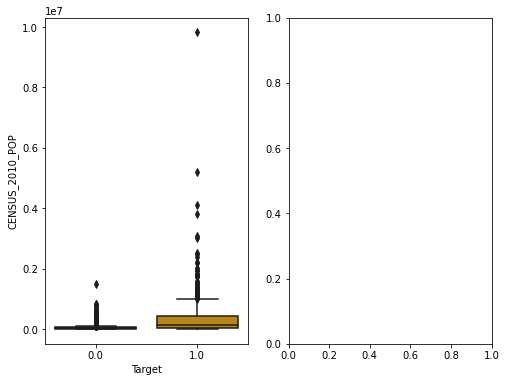

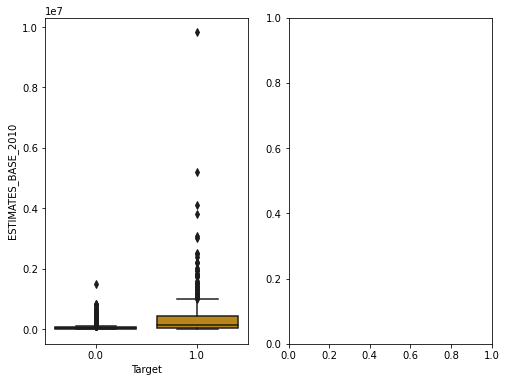

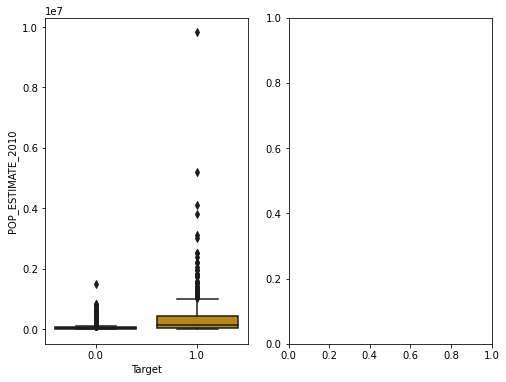

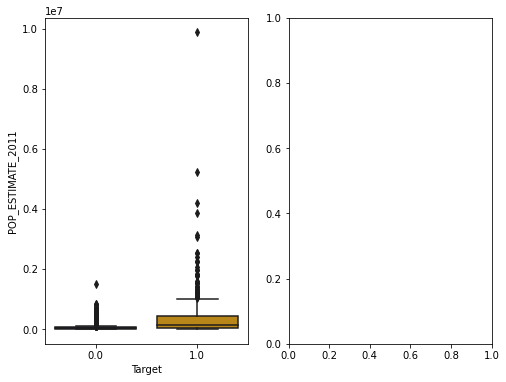

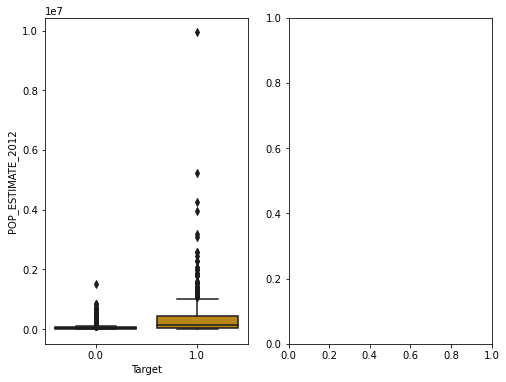

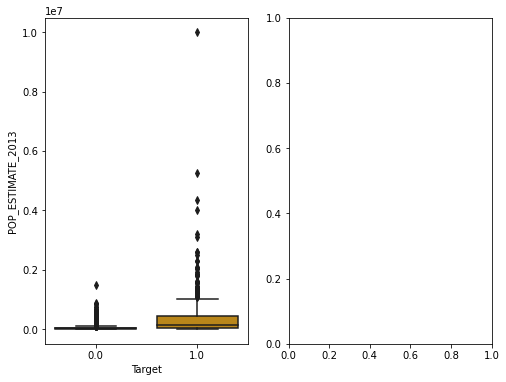

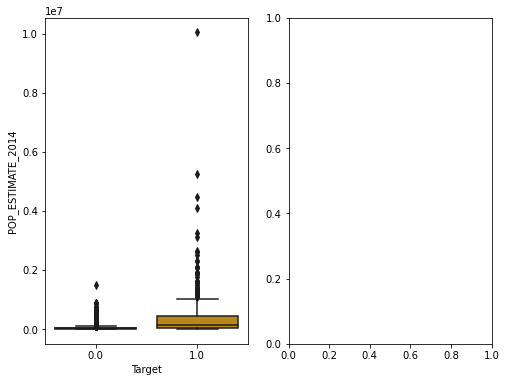

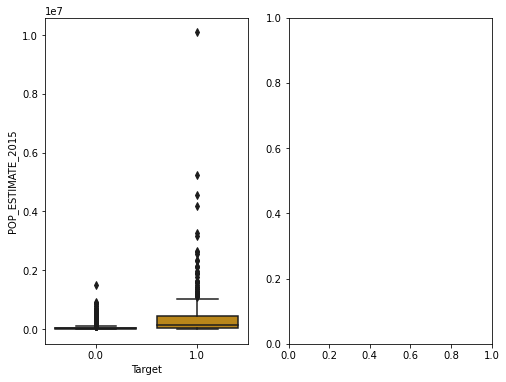

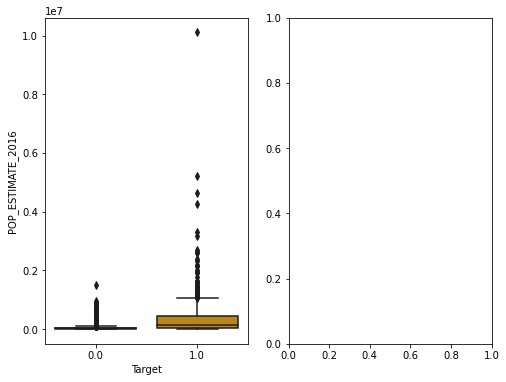

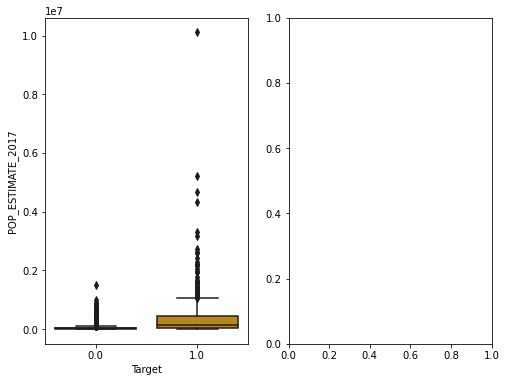

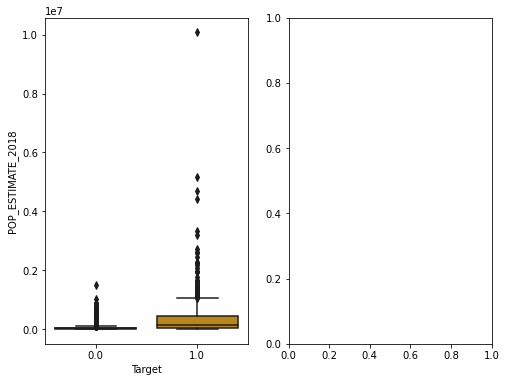

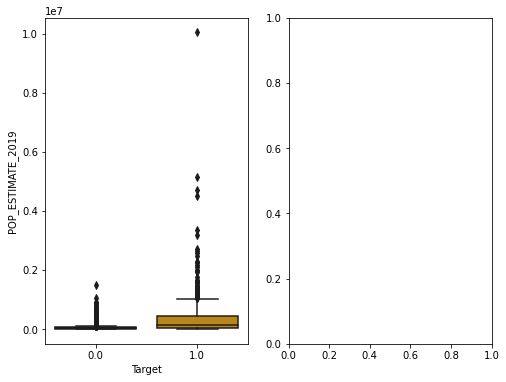

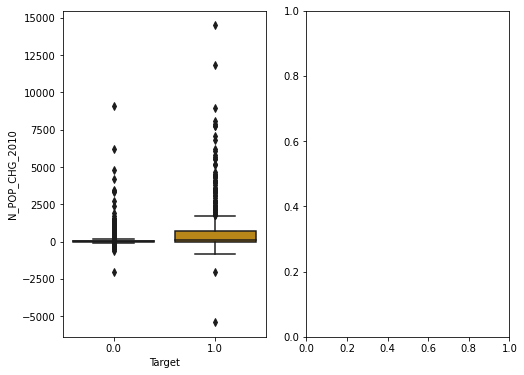

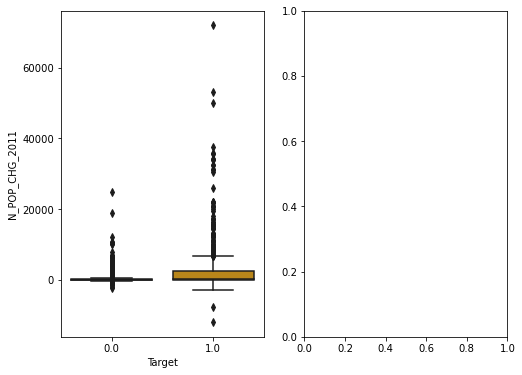

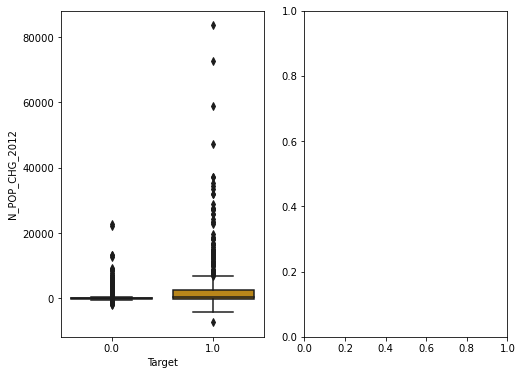

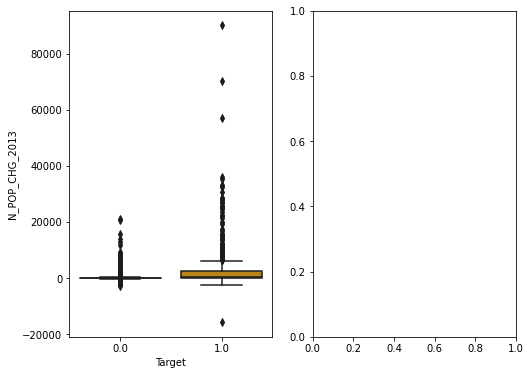

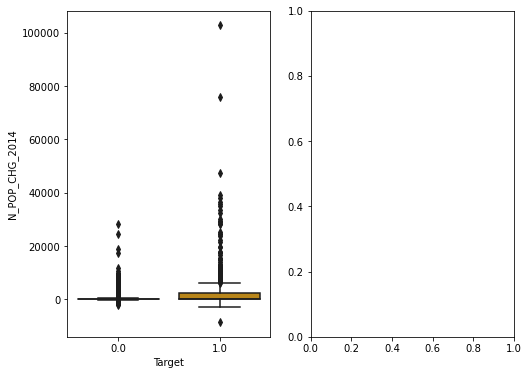

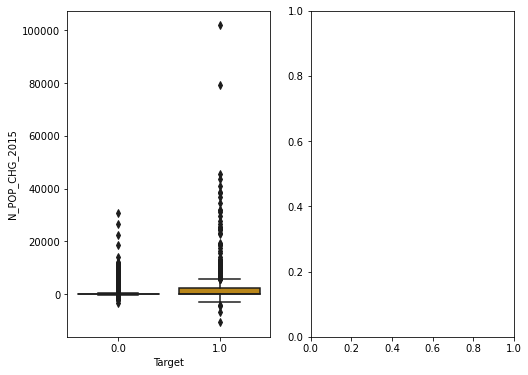

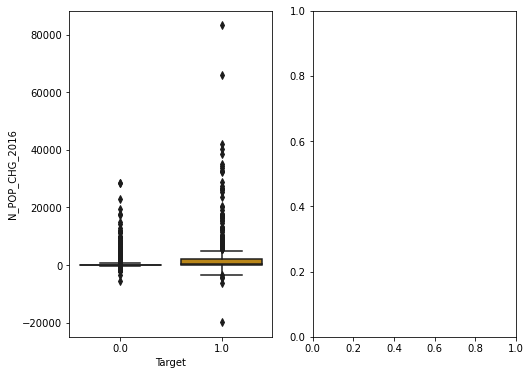

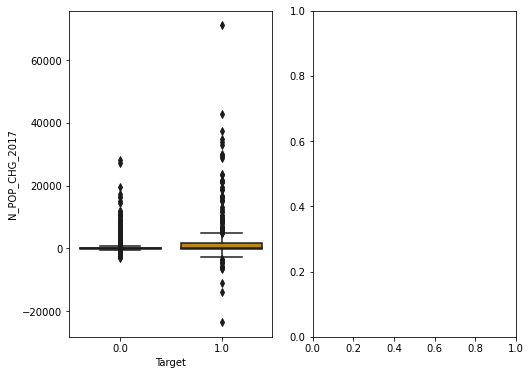

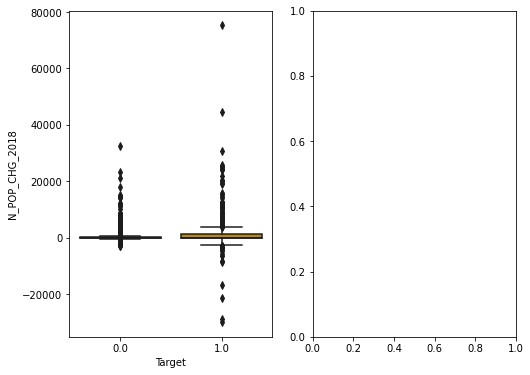

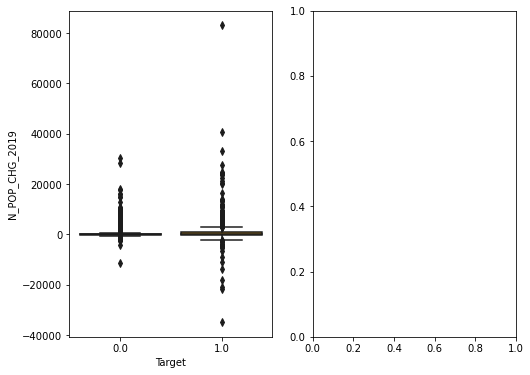

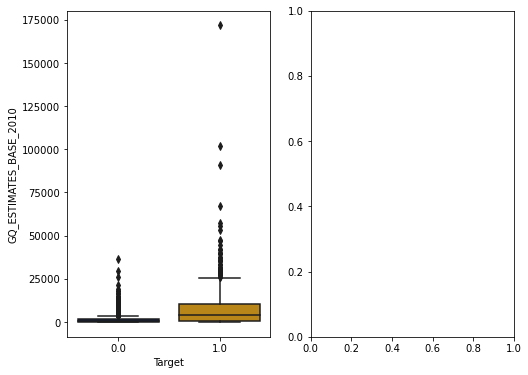

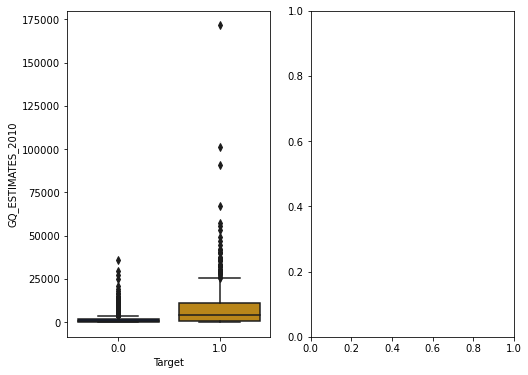

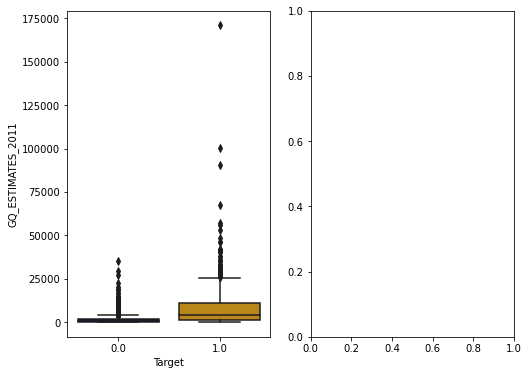

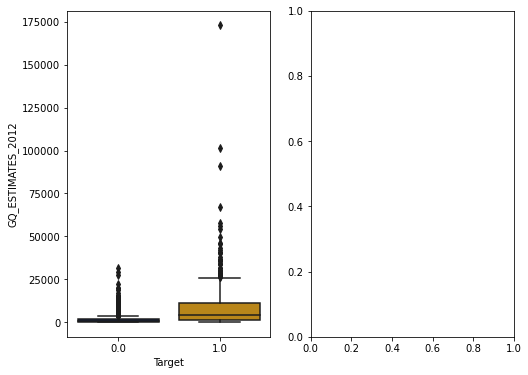

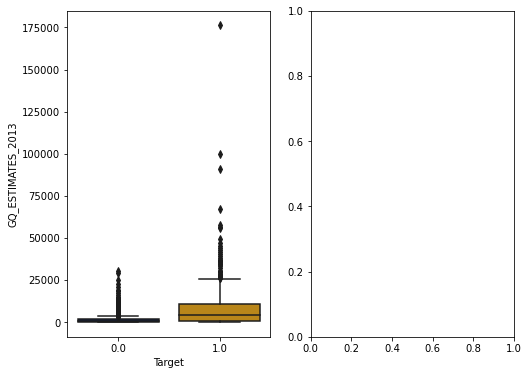

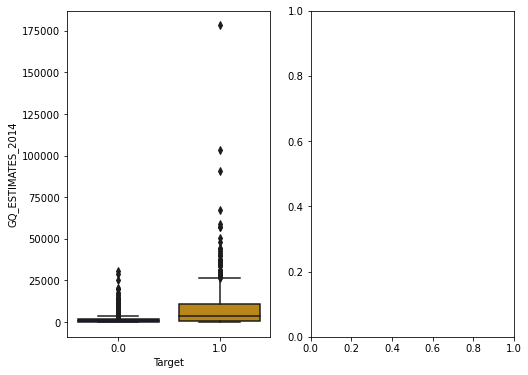

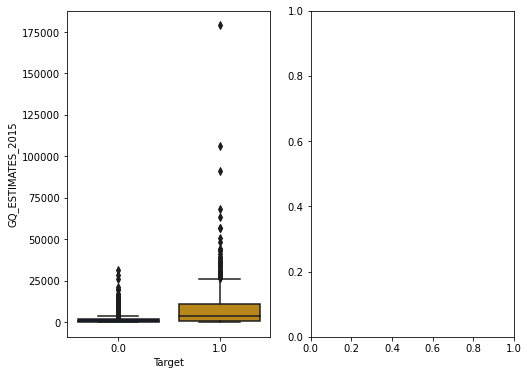

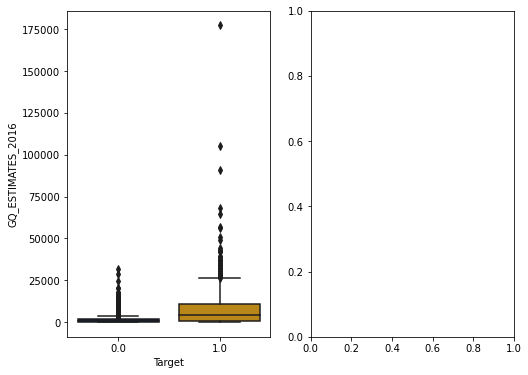

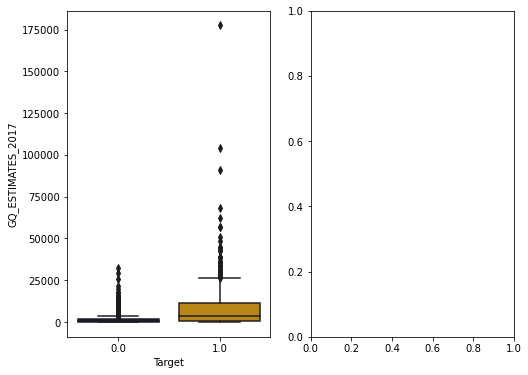

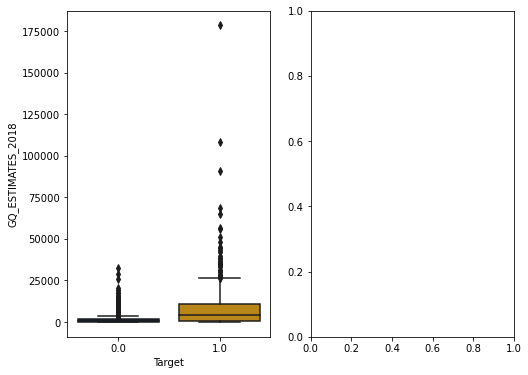

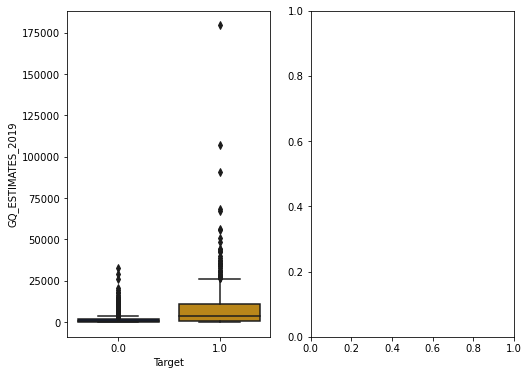

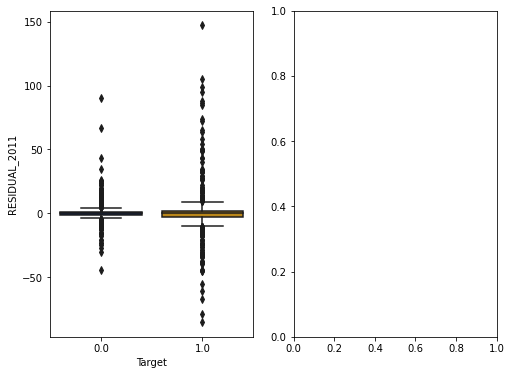

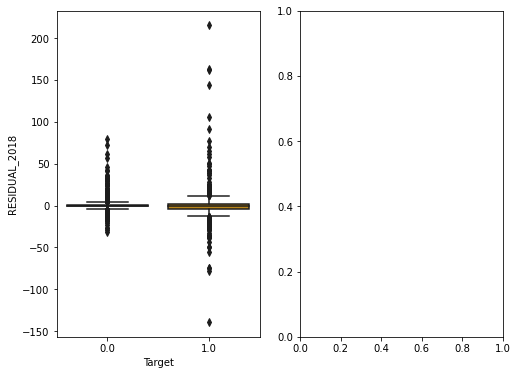

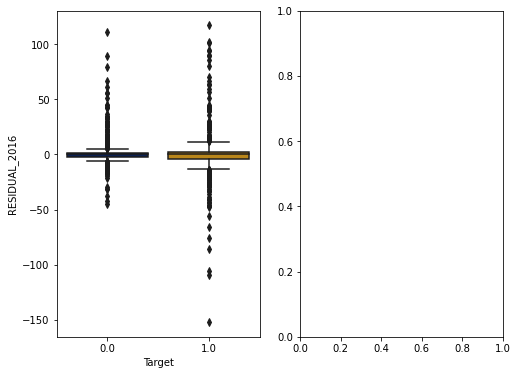

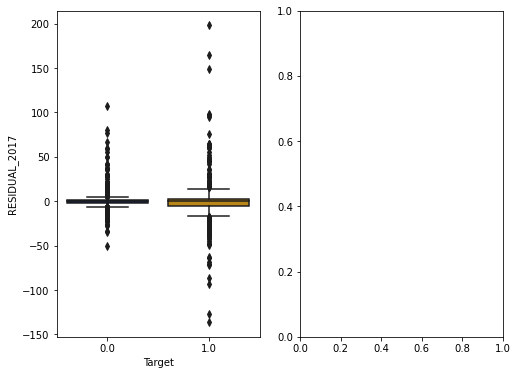

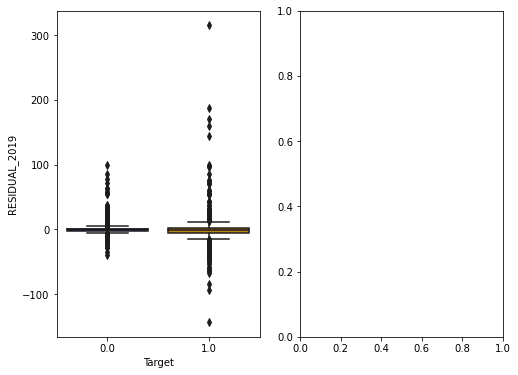

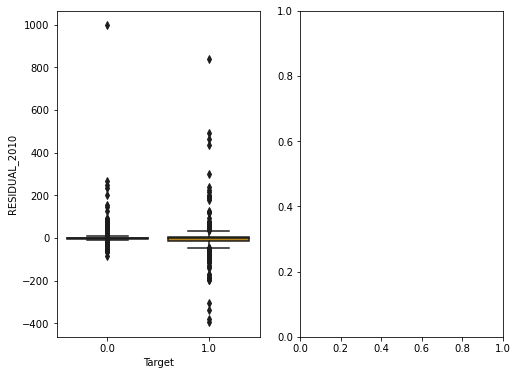

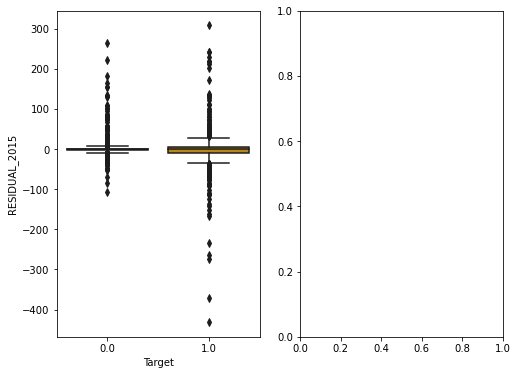

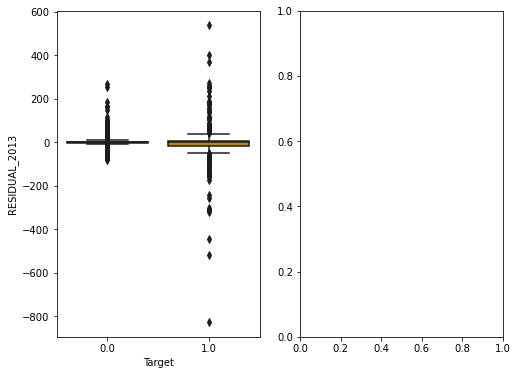

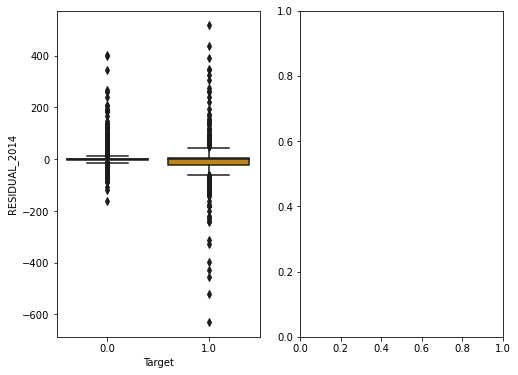

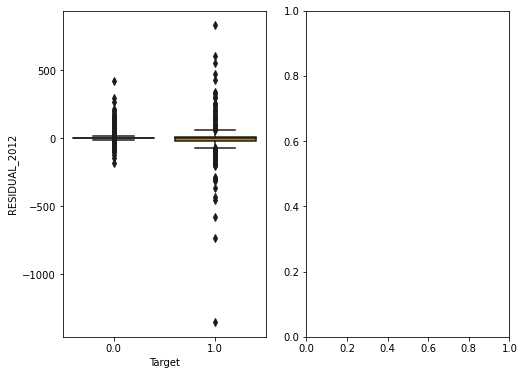

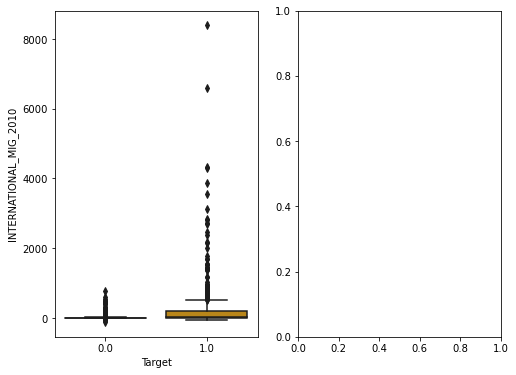

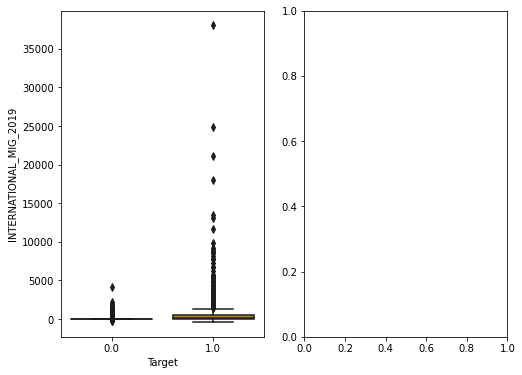

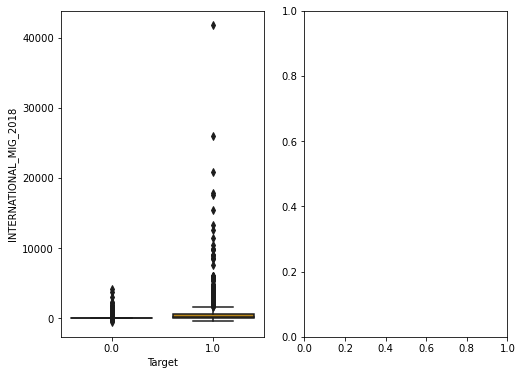

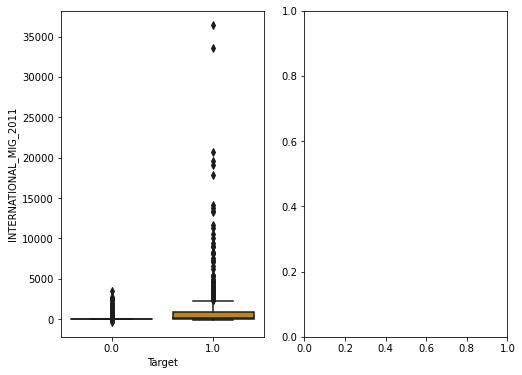

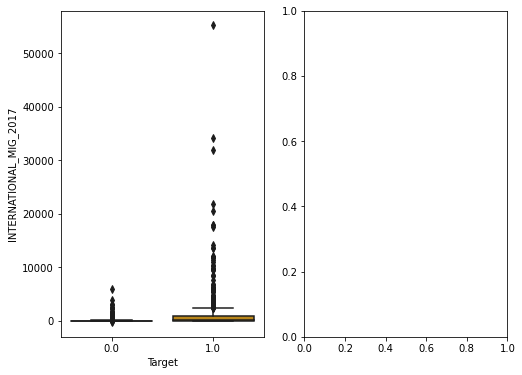

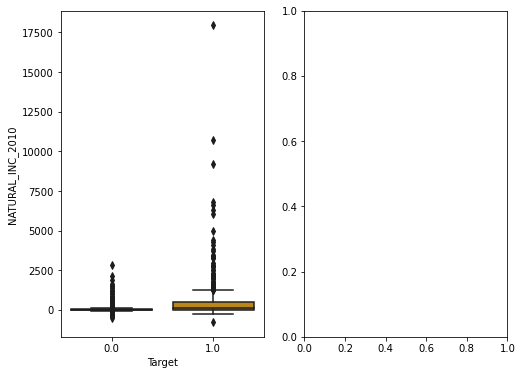

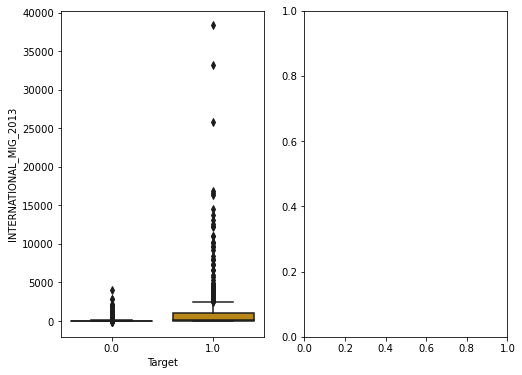

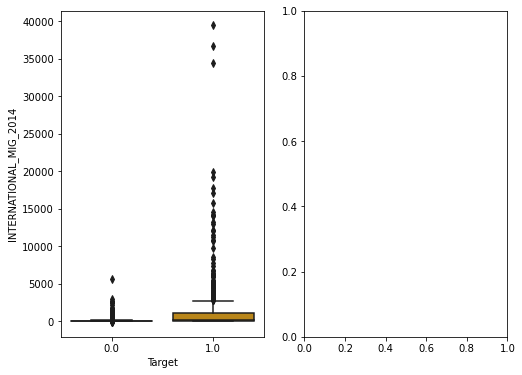

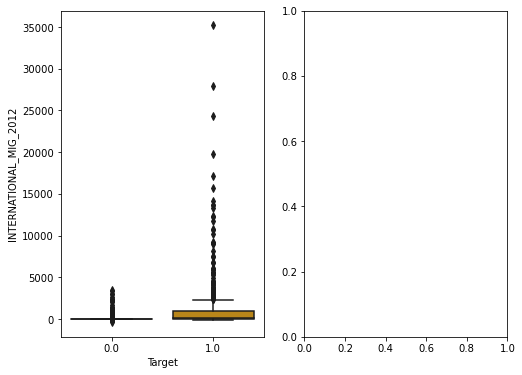

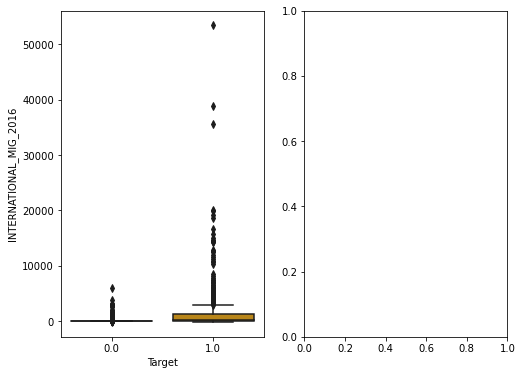

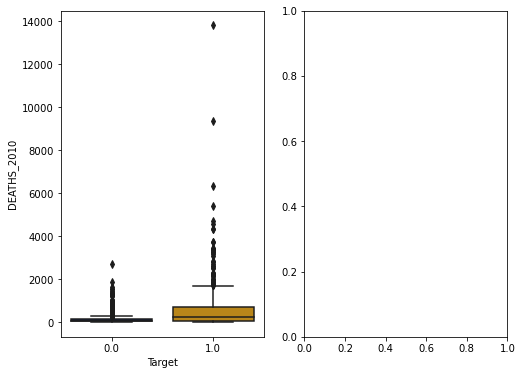

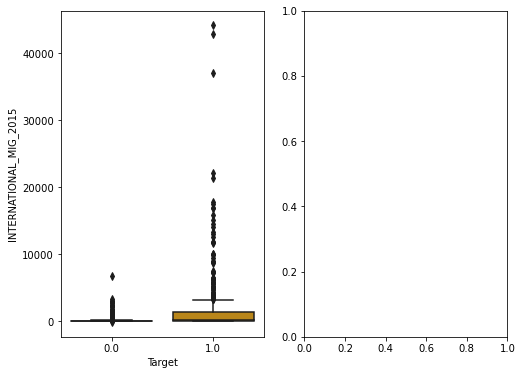

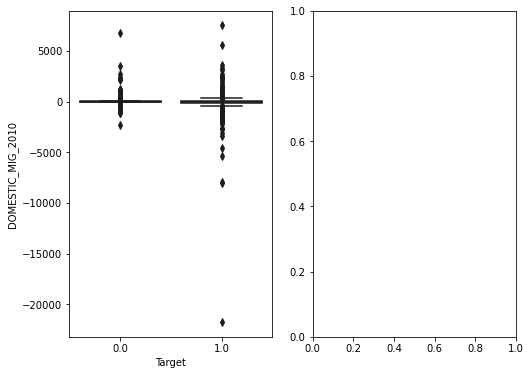

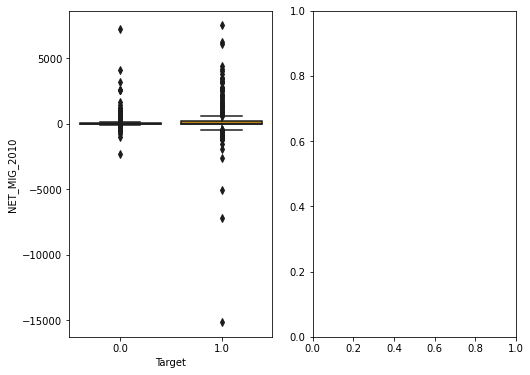

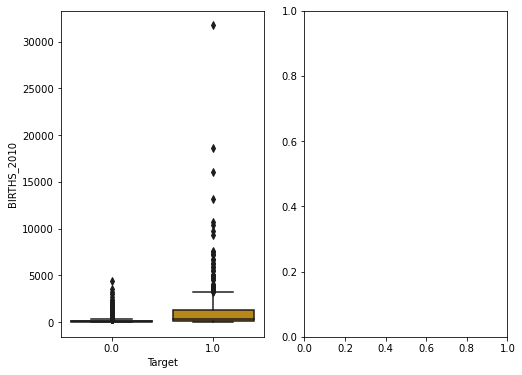

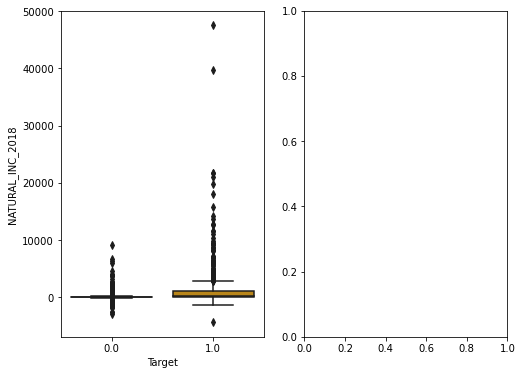

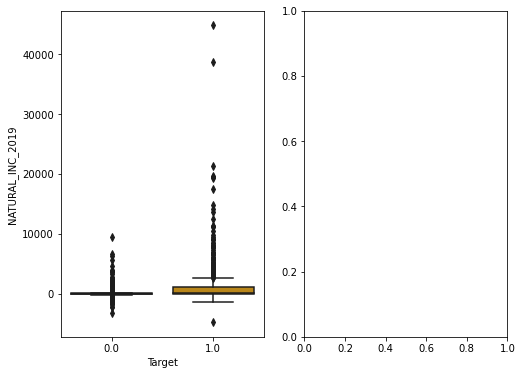

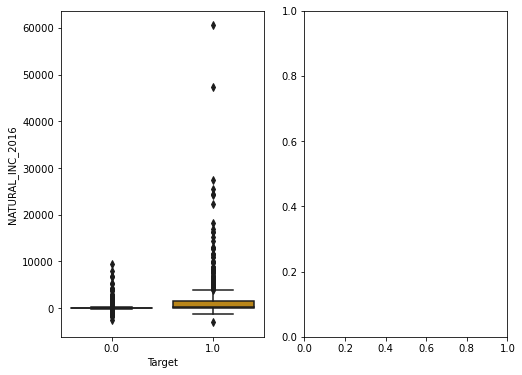

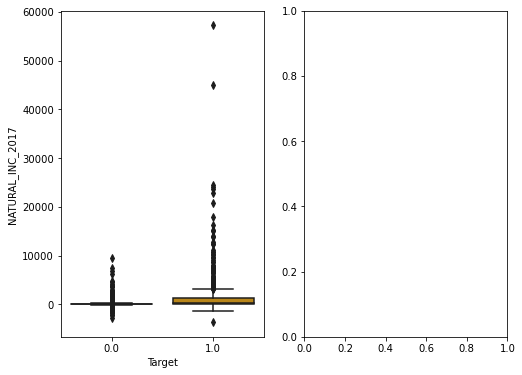

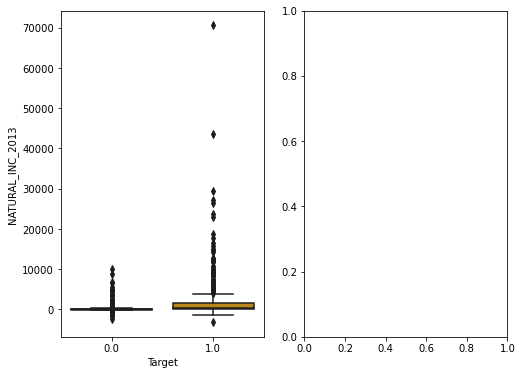

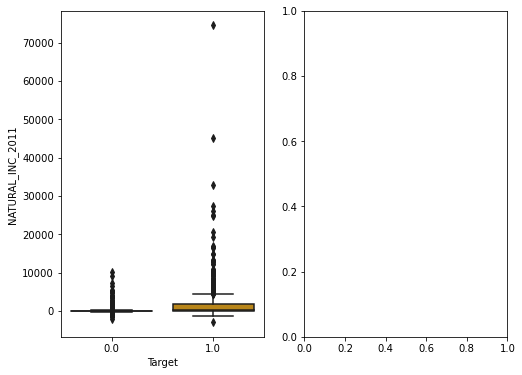

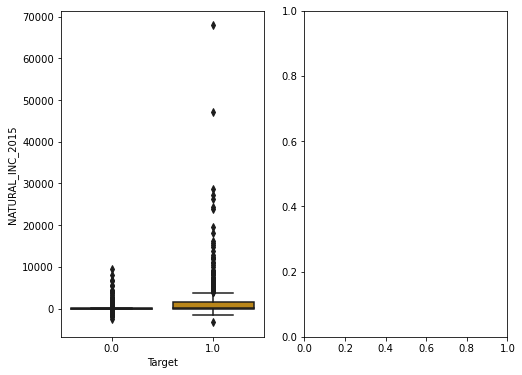

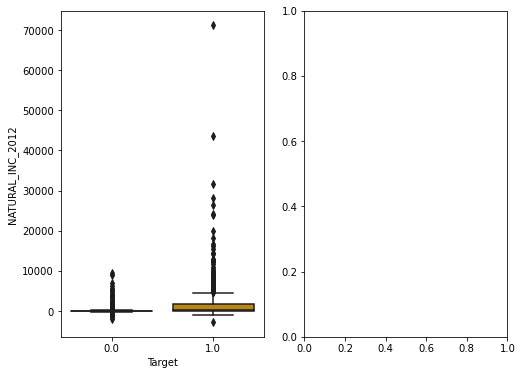

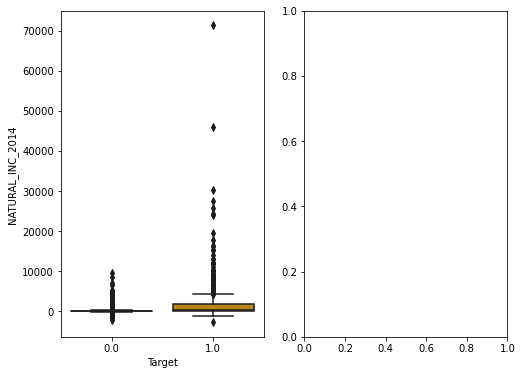

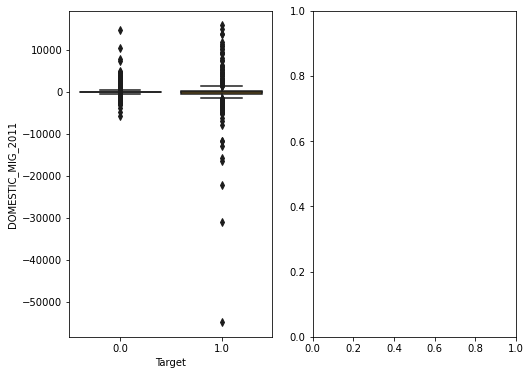

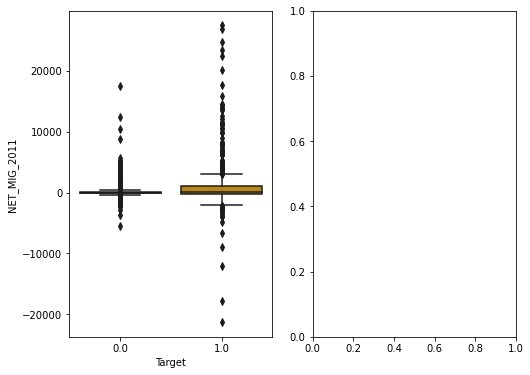

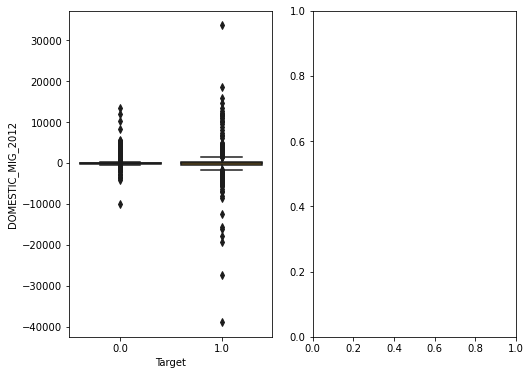

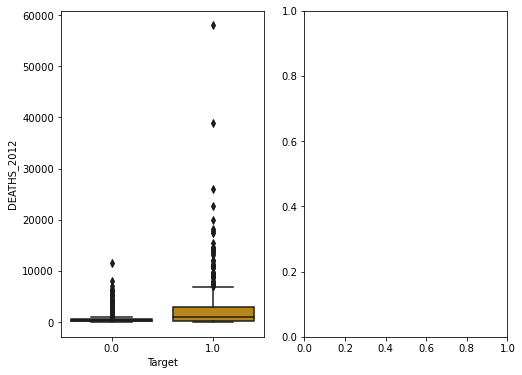

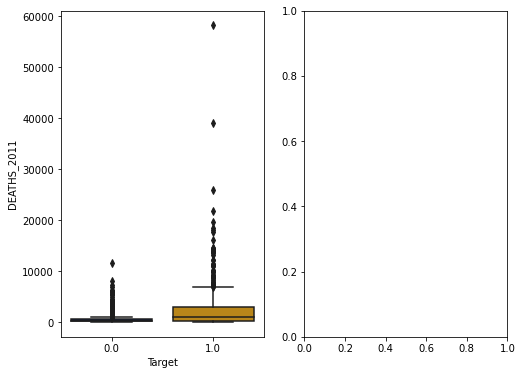

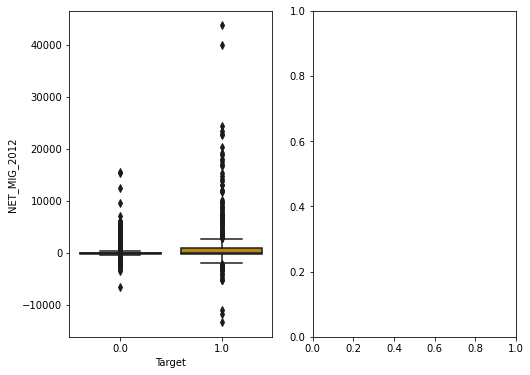

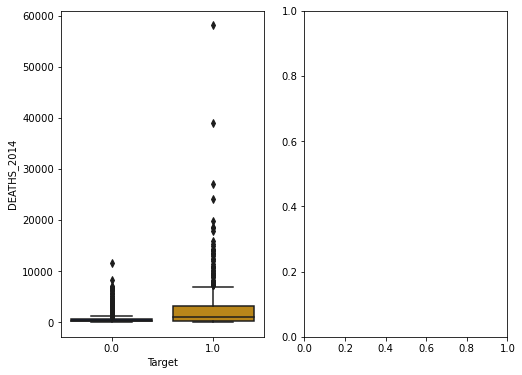

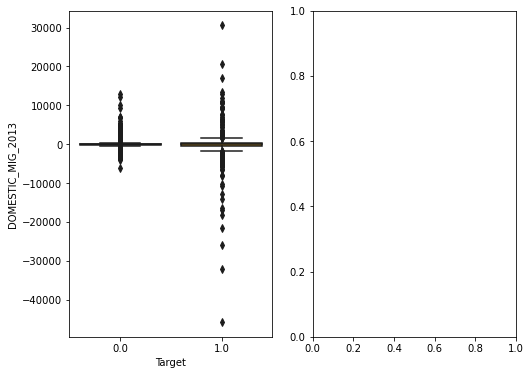

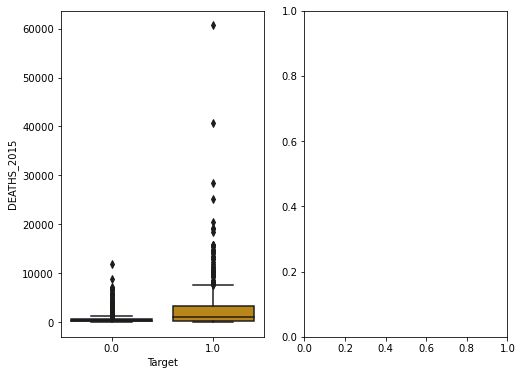

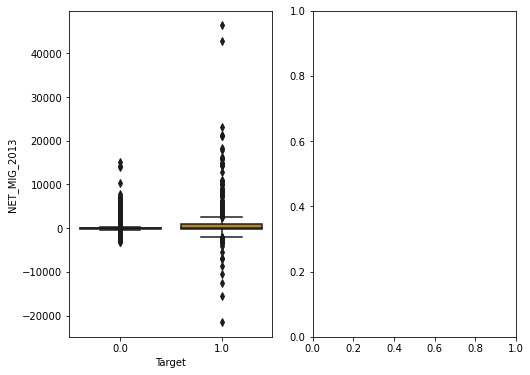

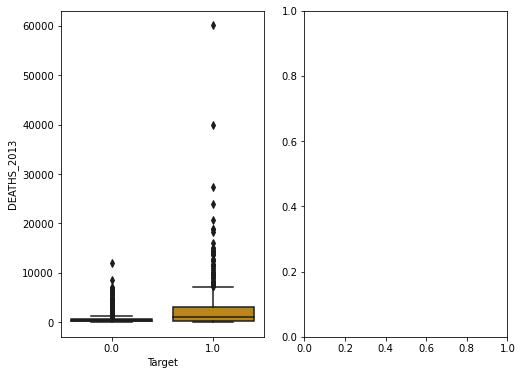

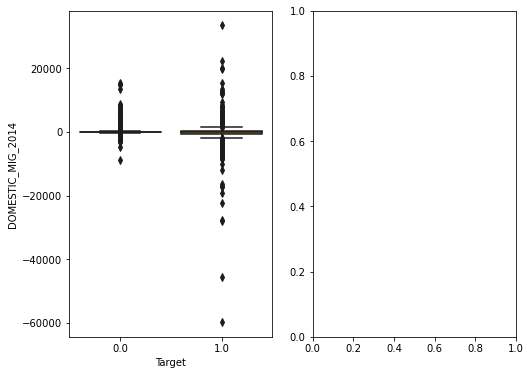

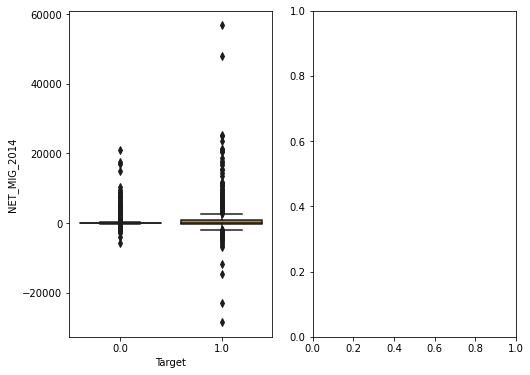

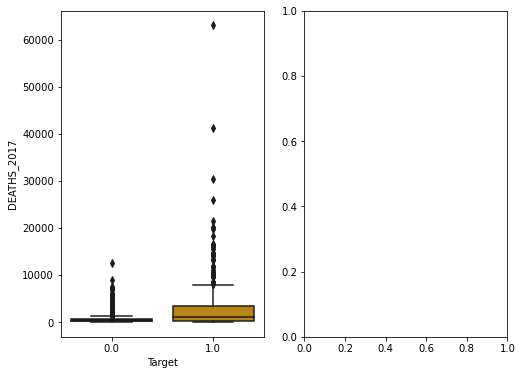

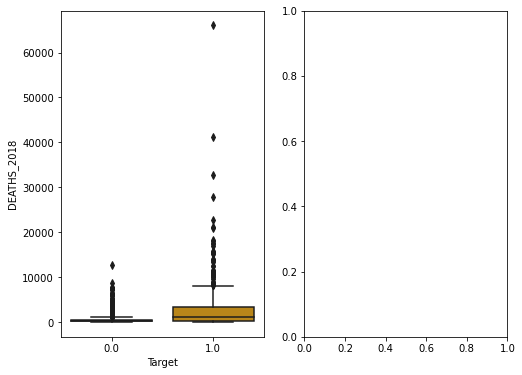

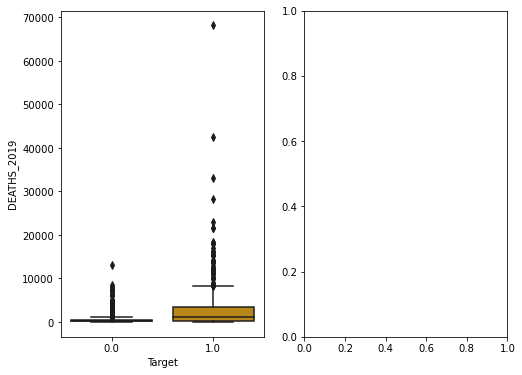

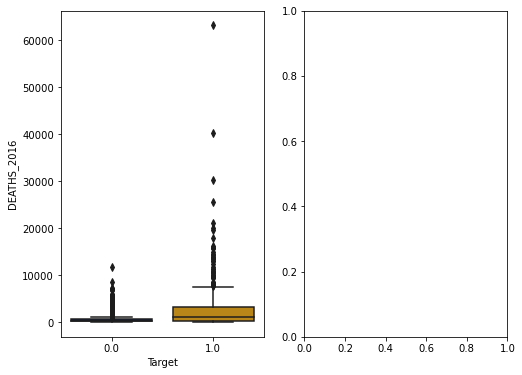

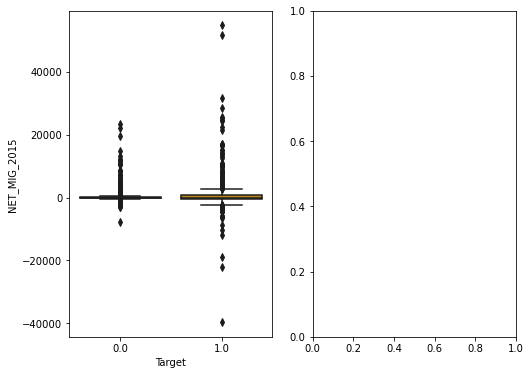

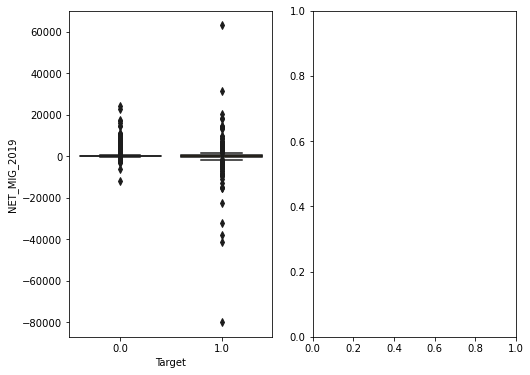

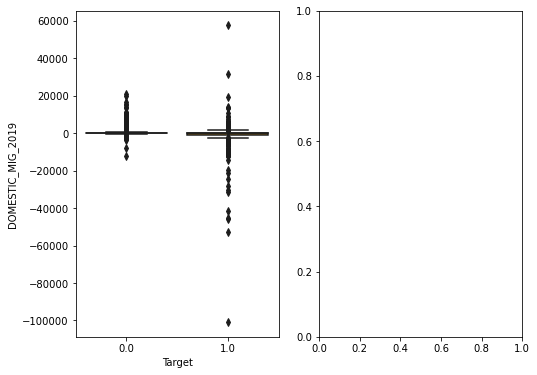

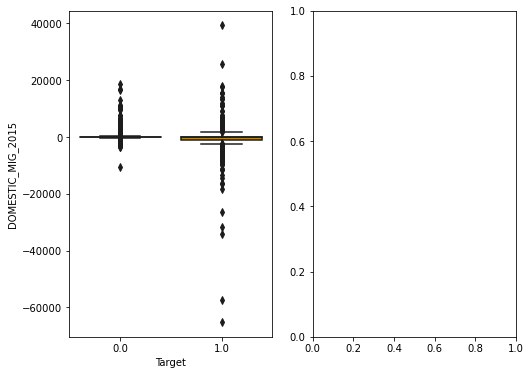

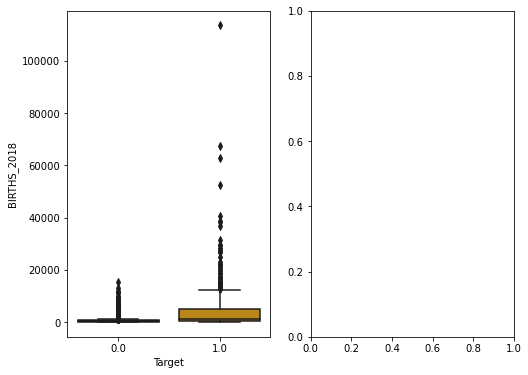

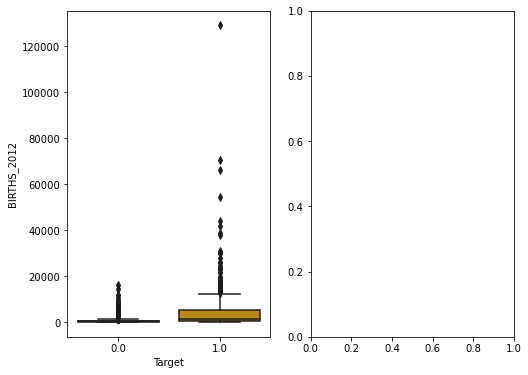

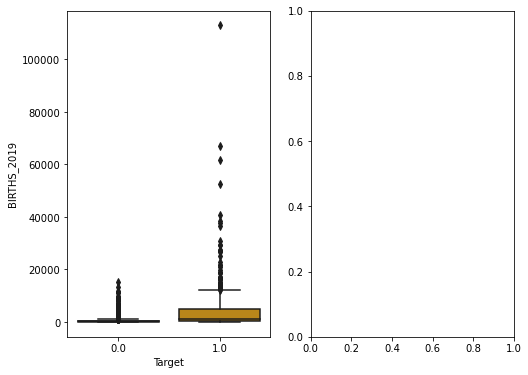

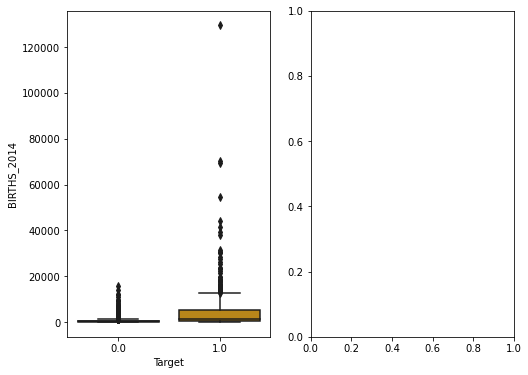

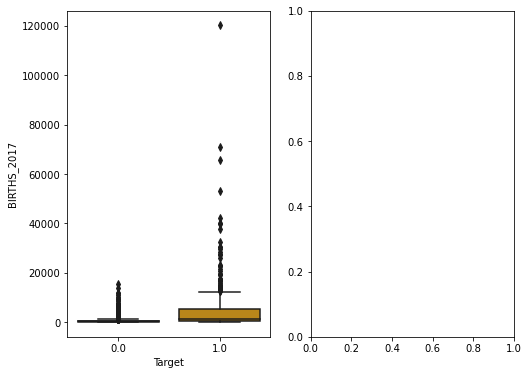

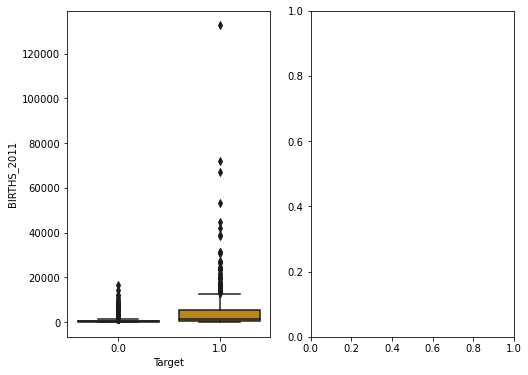

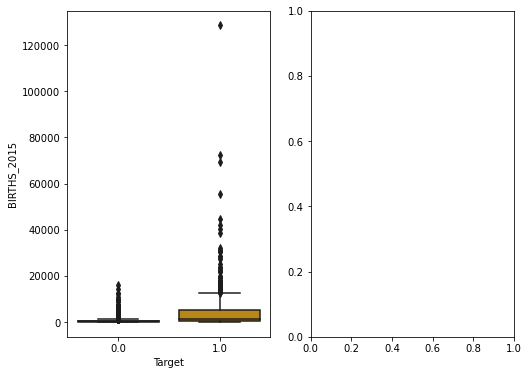

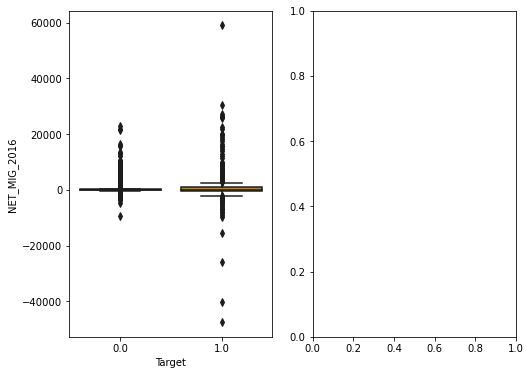

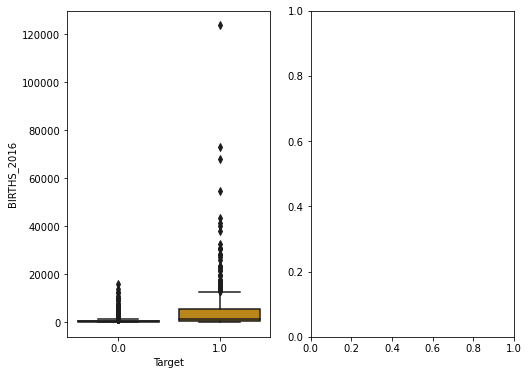

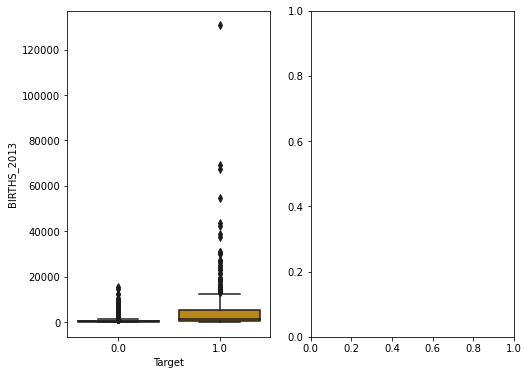

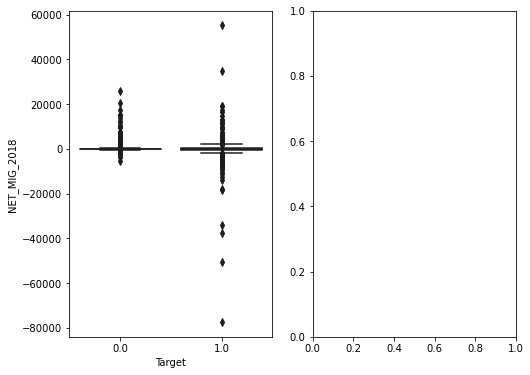

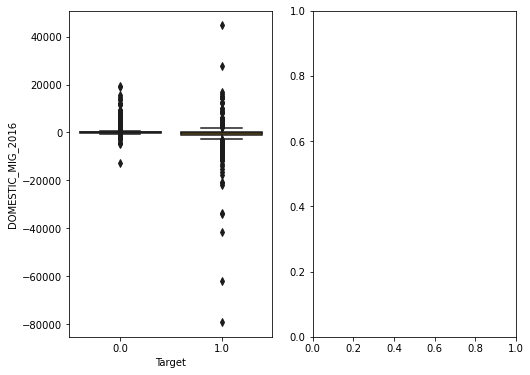

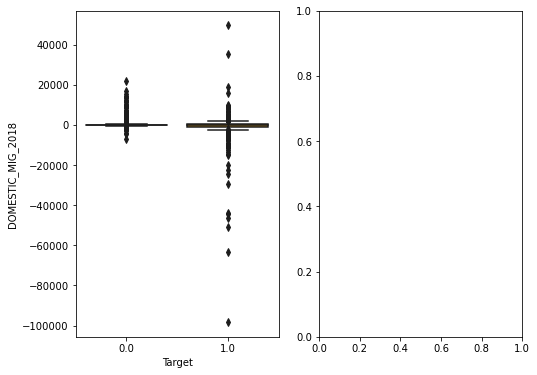

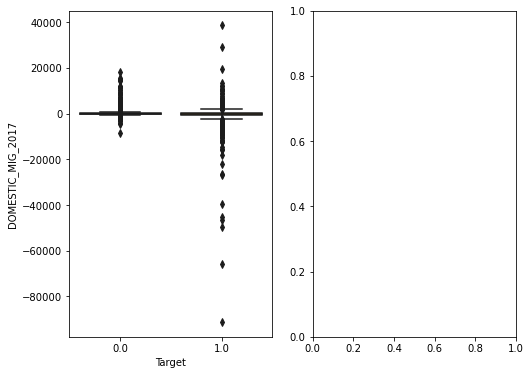

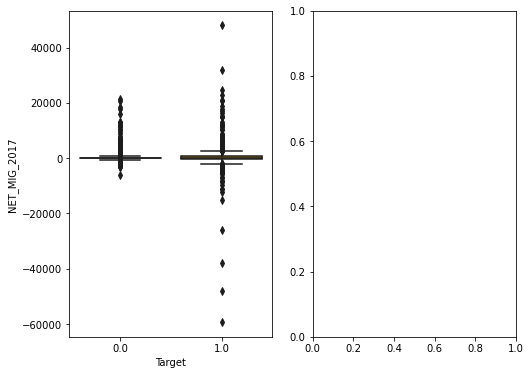

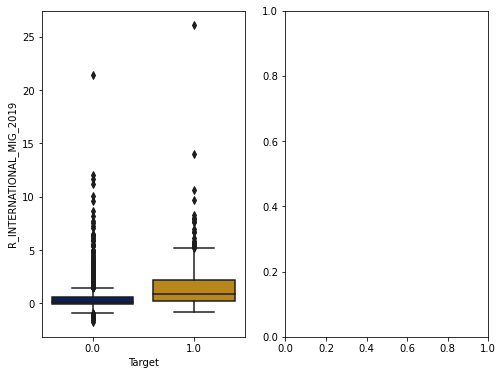

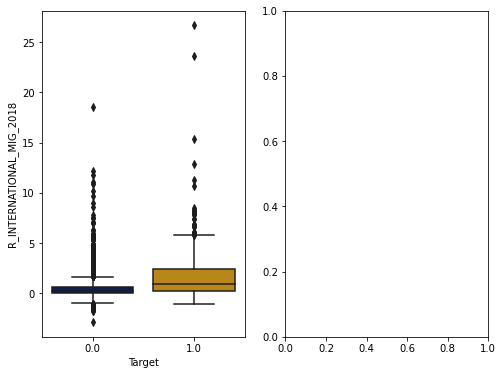

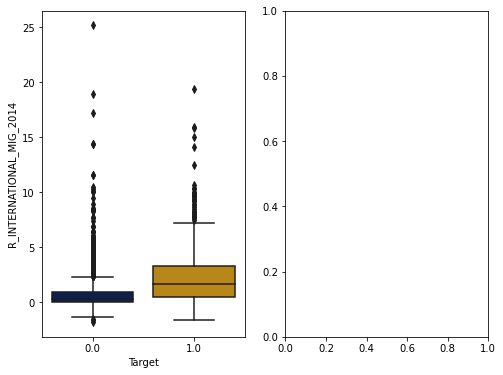

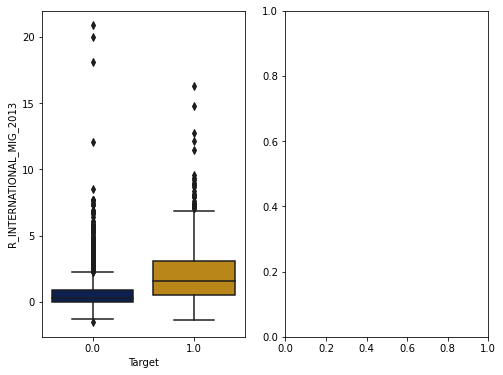

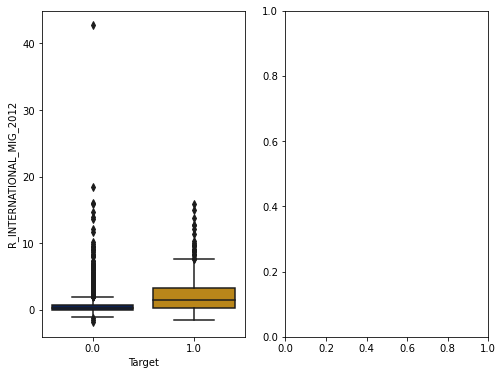

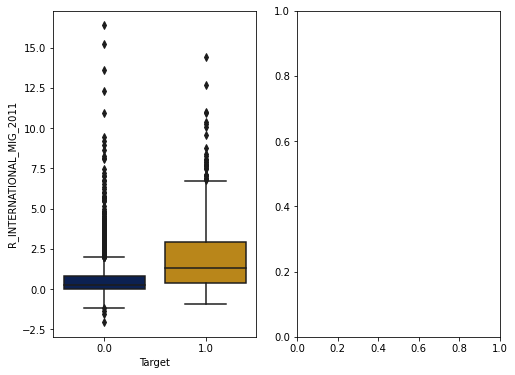

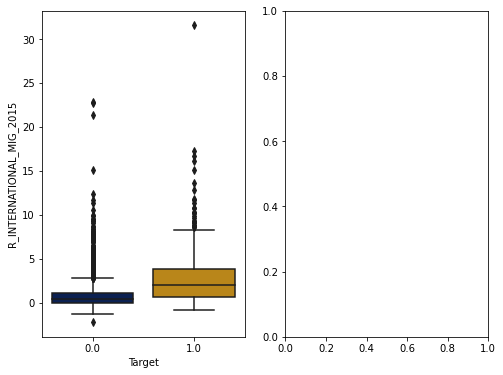

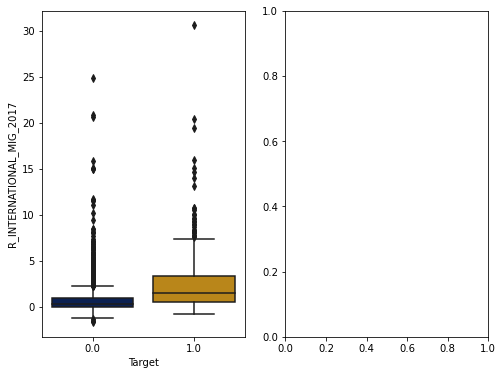

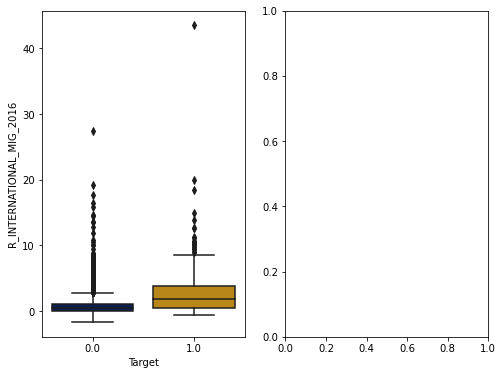

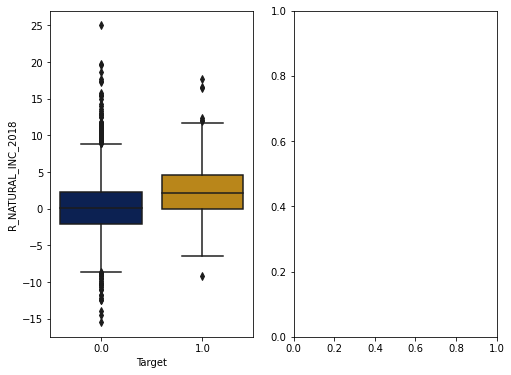

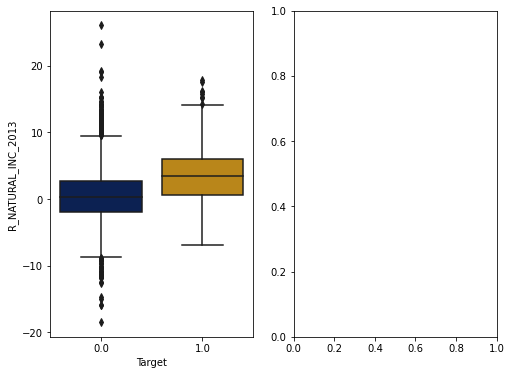

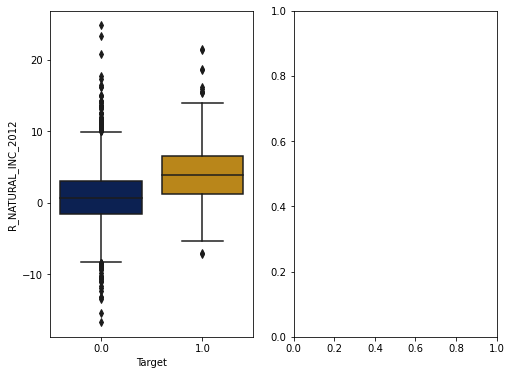

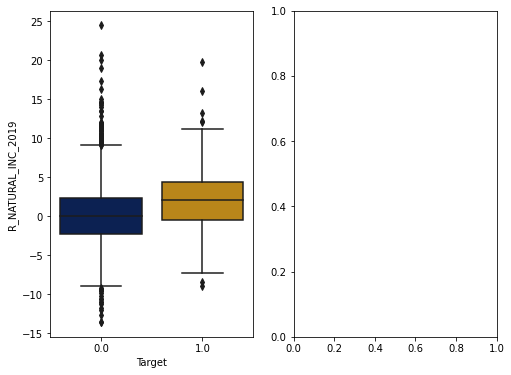

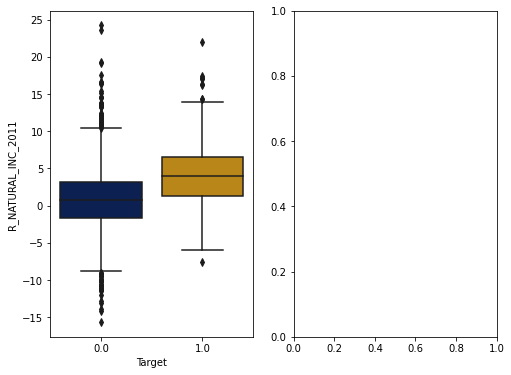

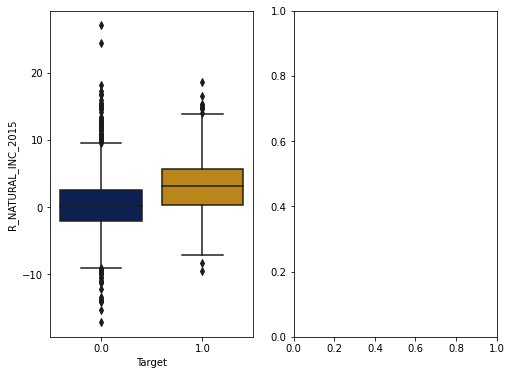

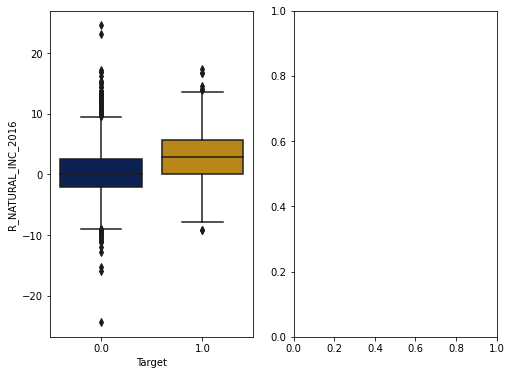

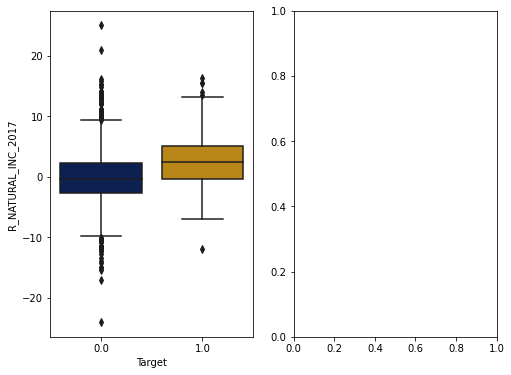

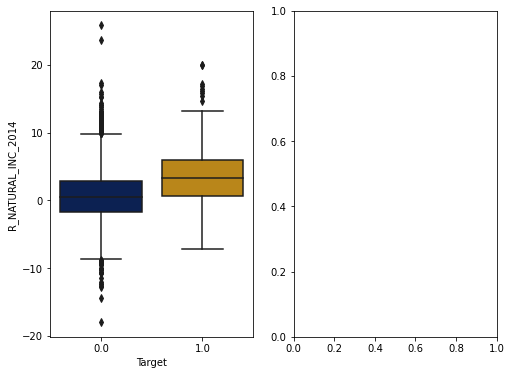

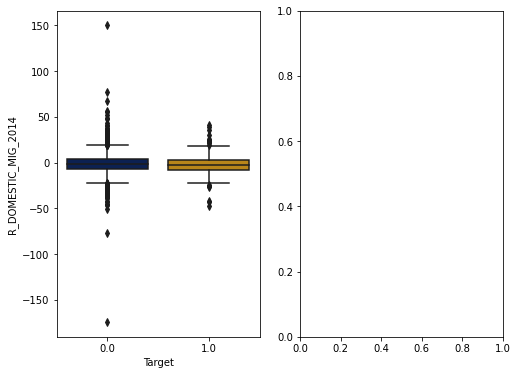

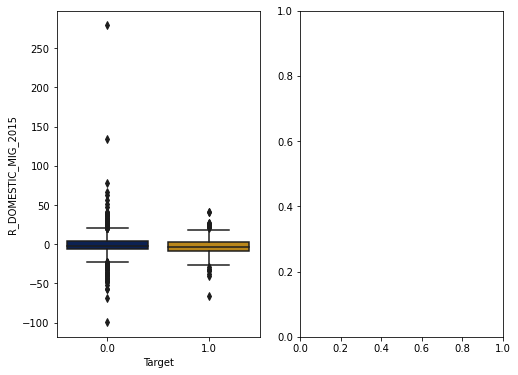

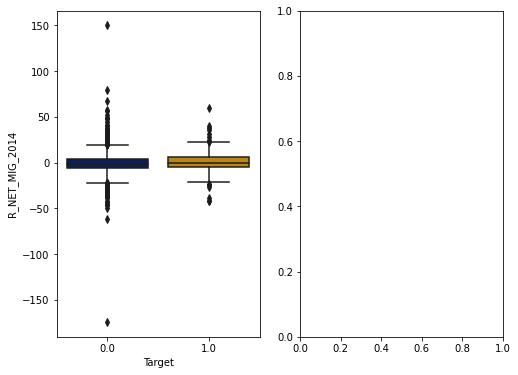

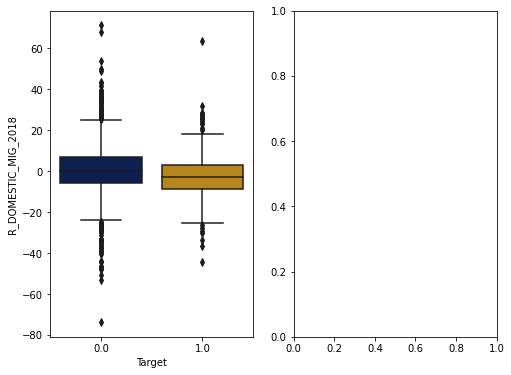

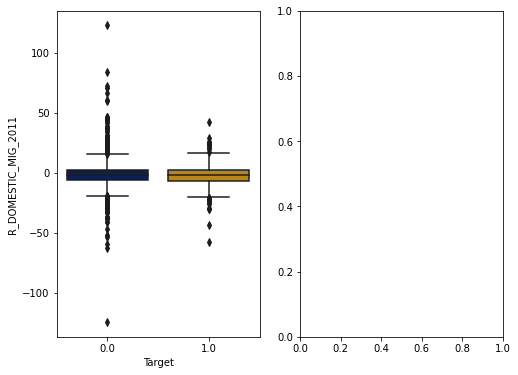

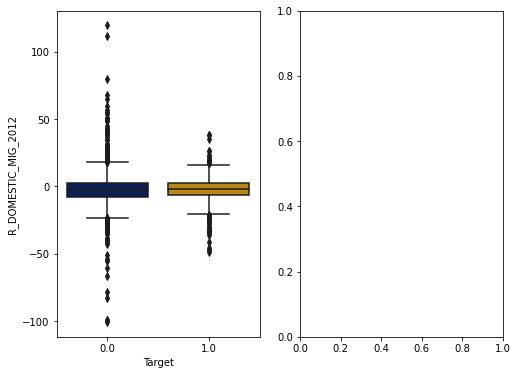

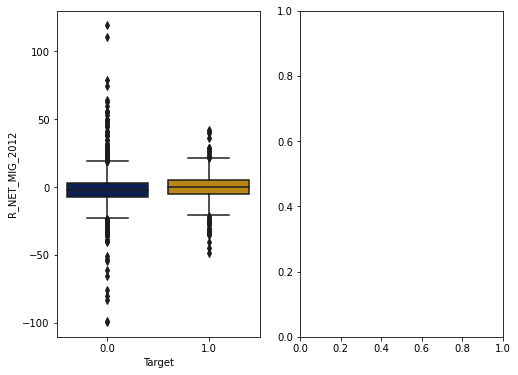

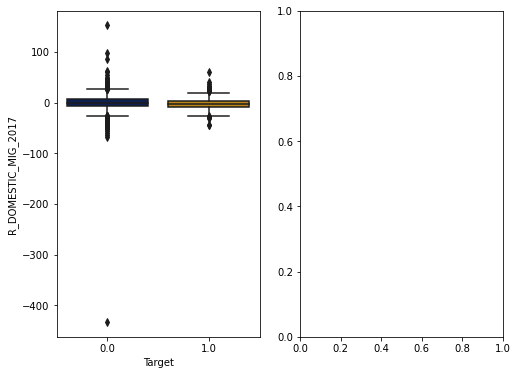

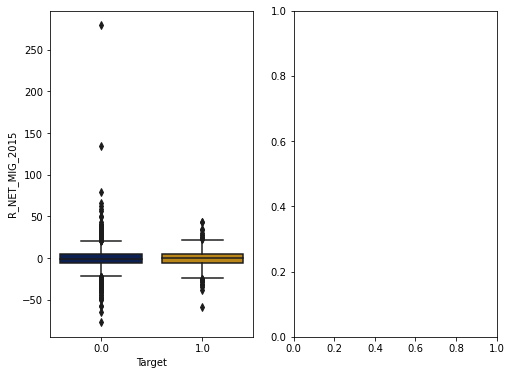

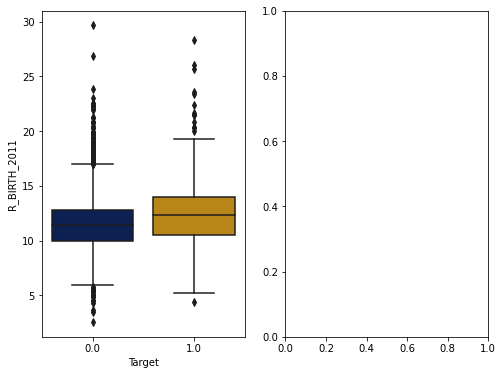

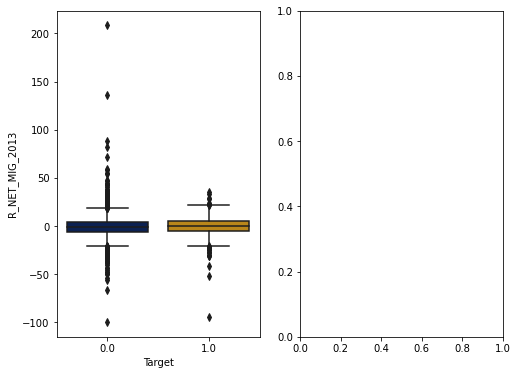

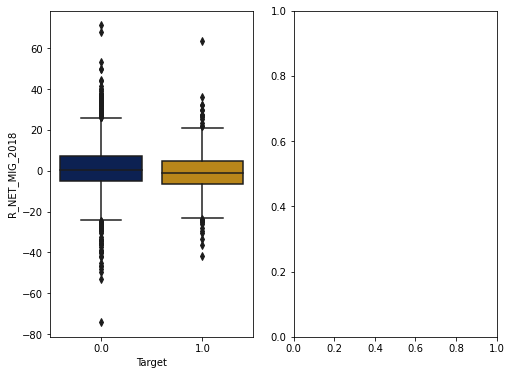

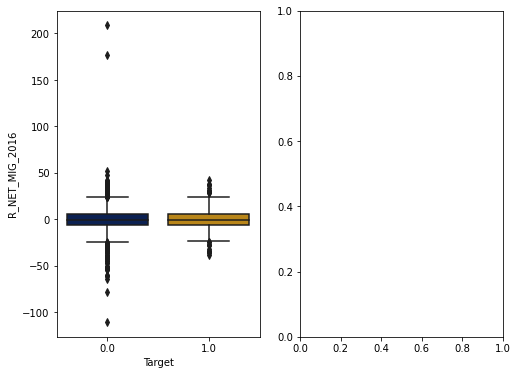

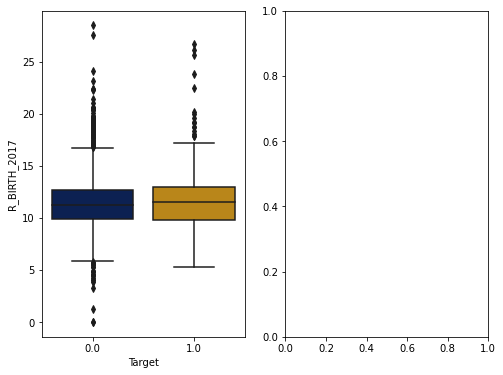

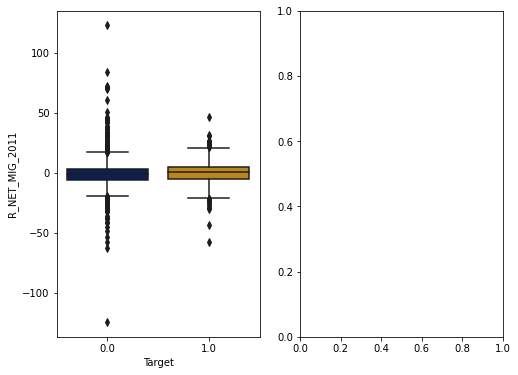

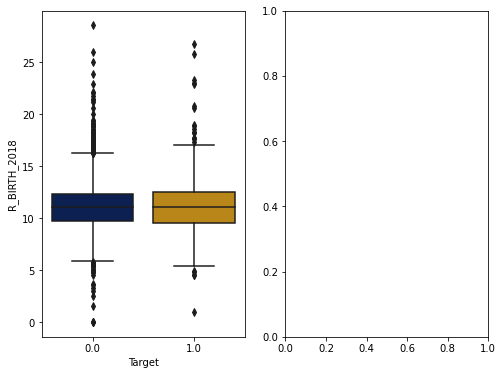

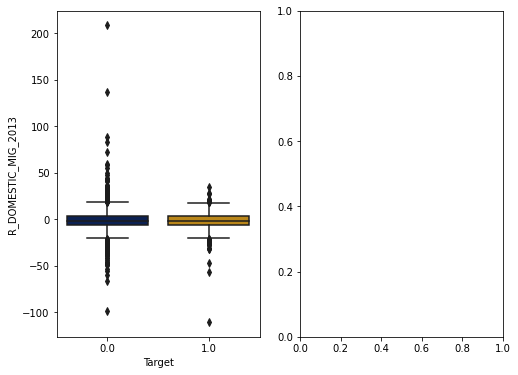

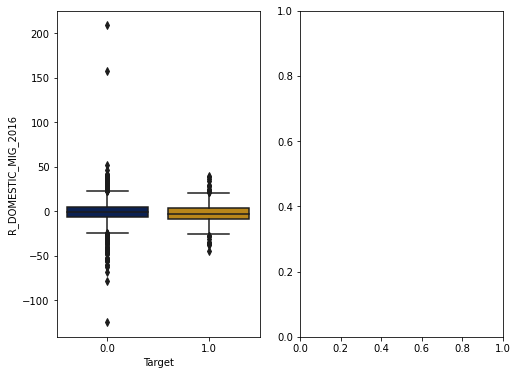

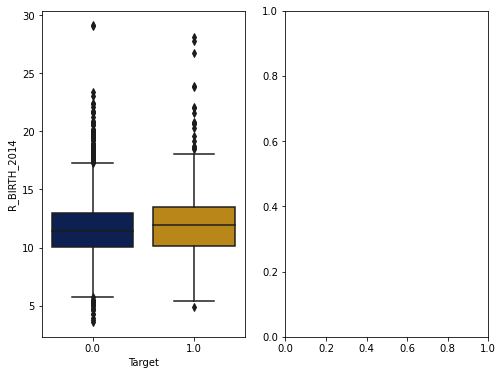

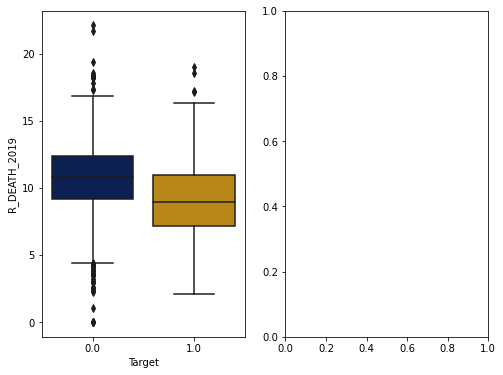

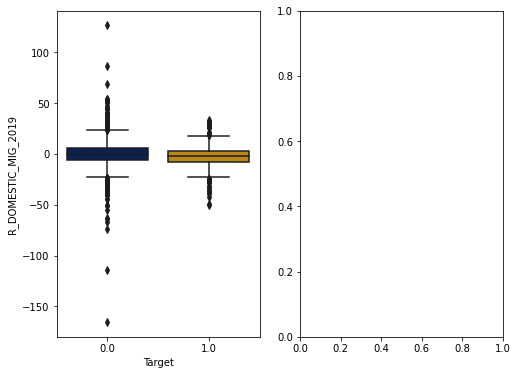

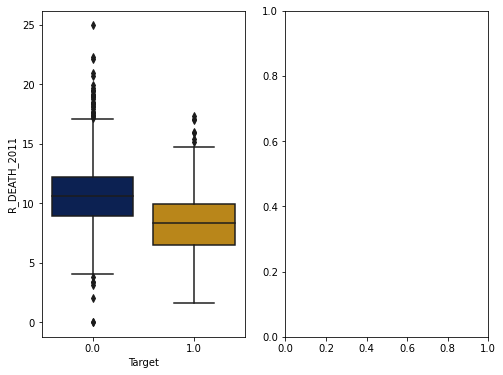

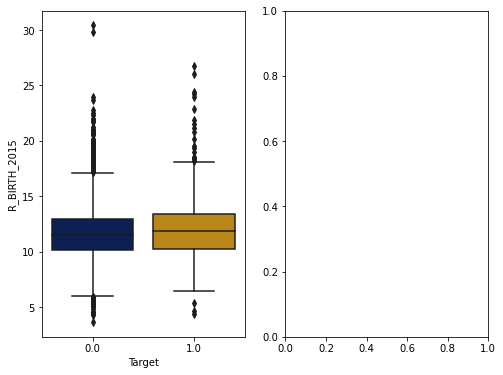

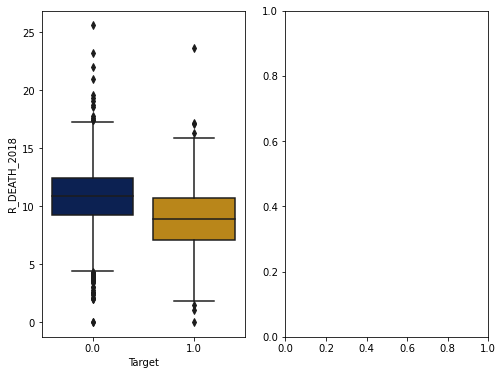

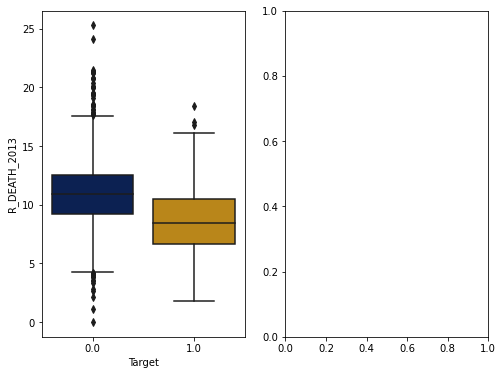

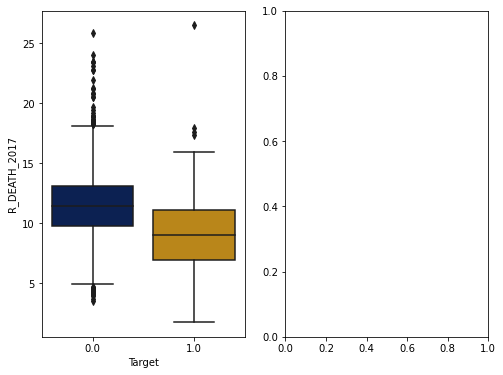

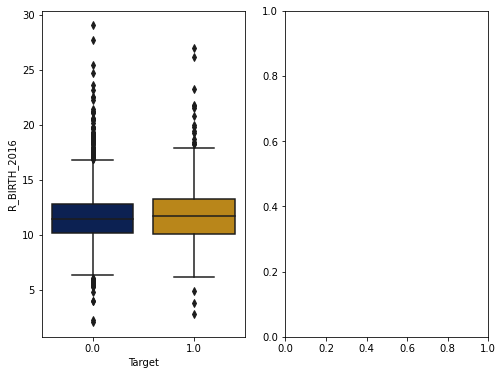

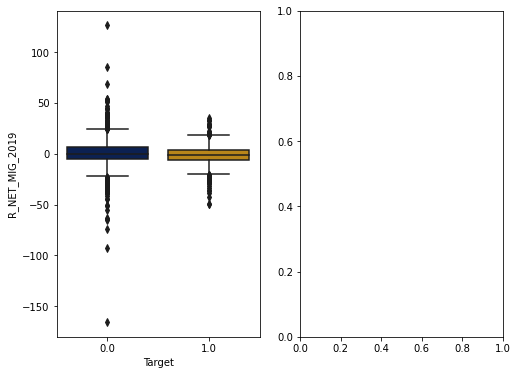

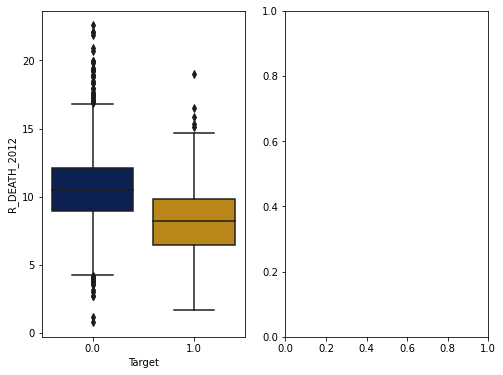

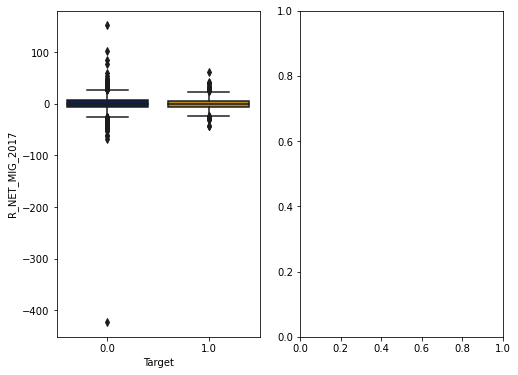

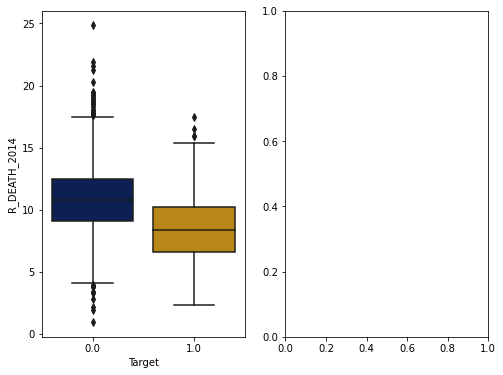

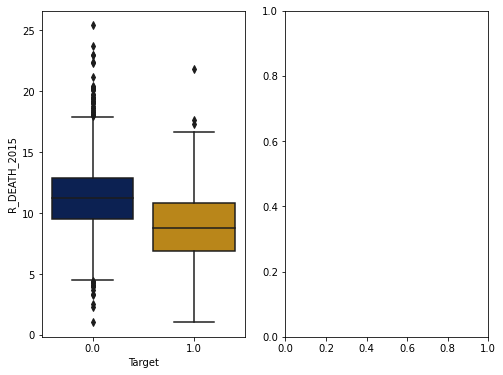

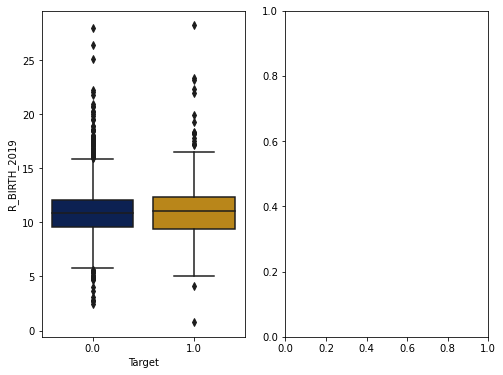

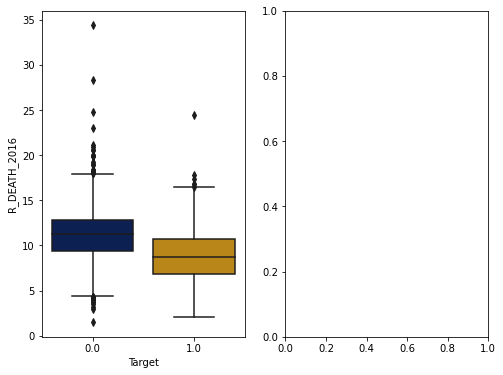

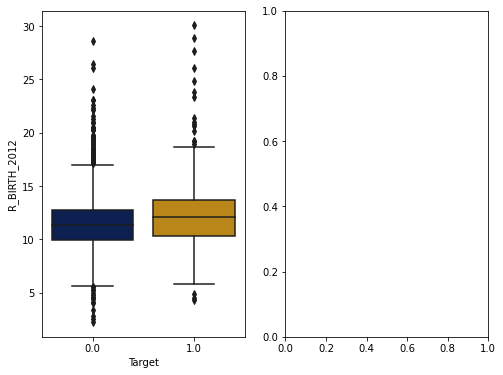

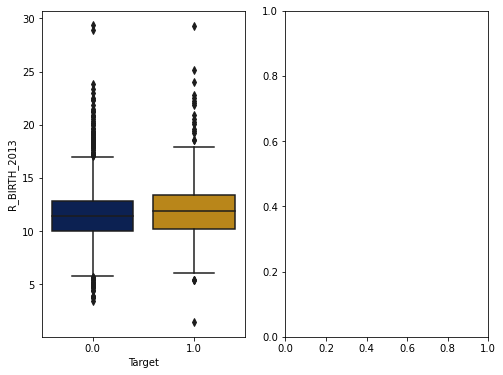

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

vars_exp = test.drop("y", axis=1)
vae = test[["y"]]
vae["y"] = vae["y"].astype("float")

num_cols = vars_exp.select_dtypes(include=np.number).columns.tolist()
for col in num_cols:
    fig, ax = plt.subplots(1, 2, figsize=(8, 6))
    sns.boxplot(x=vae["y"], y=vars_exp[col], ax=ax[0], palette=["#011C5D", "#D38F00"])
    ax[0].set_xlabel("Target")
#     sns.violinplot(x=vae["y"], y=vars_exp[col], ax=ax[1], palette=["#011C5D", "#D38F00"])
#     ax[1].set_xlabel("Target")


In [282]:
df_population.head()

FIPSTXT STATE       AREA_NAME  RURAL_URBAN_CONTINUUM_CODE_2003  \
0   00000    US   UNITED STATES                             <NA>   
1   01000    AL         ALABAMA                             <NA>   
2   01001    AL  AUTAUGA COUNTY                              2.0   
3   01003    AL  BALDWIN COUNTY                              4.0   
4   01005    AL  BARBOUR COUNTY                              6.0   

   RURAL_URBAN_CONTINUUM_CODE_2013  URBAN_INFLUENCE_CODE_2003  \
0                             <NA>                       <NA>   
1                             <NA>                       <NA>   
2                              2.0                        2.0   
3                              3.0                        5.0   
4                              6.0                        6.0   

   URBAN_INFLUENCE_CODE_2013  ECONOMIC_TYPOLOGY_2015  CENSUS_2010_POP  \
0                       <NA>                    <NA>      308745538.0   
1                       <NA>                    <NA>        4779736.0   
2                        2.0                     0.0          54571.0   
3                        2.0                     5.0         182265.0   
4                        6.0                     3.0          27457.0   

   ESTIMATES_BASE_2010  ...  R_DOMESTIC_MIG_2019  R_NET_MIG_2011  \
0          308758105.0  ...                 <NA>            <NA>   
1            4780125.0  ...             1.917501        0.578434   
2              54597.0  ...              4.84731        6.018182   
3             182265.0  ...            24.017829        16.64187   
4              27455.0  ...            -5.690302        0.292676   

   R_NET_MIG_2012  R_NET_MIG_2013  R_NET_MIG_2014  R_NET_MIG_2015  \
0            <NA>            <NA>            <NA>            <NA>   
1        1.186314        1.522549        0.563489        0.626357   
2       -6.226119       -3.902226        1.970443       -1.712875   
3       17.488579       22.751474       20.184334       17.725964   
4       -6.897817       -8.132185       -5.140431      -15.724575   

   R_NET_MIG_2016  R_NET_MIG_2017  R_NET_MIG_2018  R_NET_MIG_2019  
0            <NA>            <NA>            <NA>            <NA>  
1        0.745172        1.090366        1.773786        2.483744  
2        4.777171        0.849656        0.540916        4.560062  
3       21.279291       22.398256       24.727215       24.380567  
4      -18.238016      -24.998528       -8.754922       -5.165664  

[5 rows x 165 columns]

### Education data

Rural-Urban Continuum Codes form a classification scheme that distinguishes metropolitan counties by the population size of their metro area, and nonmetropolitan counties by degree of urbanization and adjacency to a metro area.

In [261]:
df_education = read_excel(dir_path + "data/Education.xls")
df_education.columns = standard_name_cols(df_education.columns)
df_education[["STATE", "AREA_NAME"]] = upper_consistent(df_education[["STATE", "AREA_NAME"]])
df_education["AREA_NAME"] = df_education["AREA_NAME"].replace("LOUSIANA", "LOUISIANA" )


display(df_education.head())
check_nan(df_education)
check_duplicates(df_education, df_education.columns)


========== File name README.md

Educational attainment for adults age 25 and older for the U.S., States, and counties, 1970-2019


FIPS_CODE STATE       AREA_NAME 2003_RURAL_URBAN_CONTINUUM_CODE  \
0     00000    US   UNITED STATES                             NaN   
1     01000    AL         ALABAMA                             NaN   
2     01001    AL  AUTAUGA COUNTY                               2   
3     01003    AL  BALDWIN COUNTY                               4   
4     01005    AL  BARBOUR COUNTY                               6   

  2003_URBAN_INFLUENCE_CODE 2013_RURAL_URBAN_CONTINUUM_CODE  \
0                       NaN                             NaN   
1                       NaN                             NaN   
2                         2                               2   
3                         5                               3   
4                         6                               6   

  2013_URBAN_INFLUENCE_CODE LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__1970  \
0                       NaN                              52373312   
1                       NaN                               1062306   
2                         2                                  6611   
3                         2                                 18726   
4                         6                                  8120   

  HIGH_SCHOOL_DIPLOMA_ONLY__1970 SOME_COLLEGE__1_3_YEARS___1970  ...  \
0                       34158051                       11650730  ...   
1                         468269                         136287  ...   
2                           3757                            933  ...   
3                           8426                           2334  ...   
4                           2242                            581  ...   

  PERCENT_OF_ADULTS_COMPLETING_SOME_COLLEGE_OR_ASSOCIATE_S_DEGREE__2000  \
0                                               27.4                      
1                                               25.9                      
2                                               26.9                      
3                                               29.3                      
4                                               21.3                      

  PERCENT_OF_ADULTS_WITH_A_BACHELOR_S_DEGREE_OR_HIGHER__2000  \
0                                               24.4           
1                                                 19           
2                                                 18           
3                                               23.1           
4                                               10.9           

  LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__2015_19 HIGH_SCHOOL_DIPLOMA_ONLY__2015_19  \
0                                 26472261                          59472748   
1                                   458922                           1022839   
2                                     4291                             12551   
3                                    13893                             41797   
4                                     4812                              6396   

  SOME_COLLEGE_OR_ASSOCIATE_S_DEGREE__2015_19  \
0                                    63756905   
1                                      993344   
2                                       10596   
3                                       47274   
4                                        4676   

  BACHELOR_S_DEGREE_OR_HIGHER__2015_19  \
0                             70920162   
1                               845772   
2                                 9929   
3                                48148   
4                                 2080   

  PERCENT_OF_ADULTS_WITH_LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__2015_19  \
0                                          11.998918                
1                                          13.819302                
2                                          11.483395                
3                                           9.193843                
4                                          26.786907                

  PERCENT_OF_ADULTS_WITH_A_HIGH_SCHOOL_DIPLOMA_ONLY__2015_19  \
0               

=== Check NAN
... nb of columns with NAN 44 out of 47
LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__1970... 2.95%
HIGH_SCHOOL_DIPLOMA_ONLY__1970... 2.95%
SOME_COLLEGE__1_3_YEARS___1970... 2.95%
FOUR_YEARS_OF_COLLEGE_OR_HIGHER__1970... 2.95%
PERCENT_OF_ADULTS_WITH_LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__1970... 2.95%
PERCENT_OF_ADULTS_WITH_A_HIGH_SCHOOL_DIPLOMA_ONLY__1970... 2.95%
PERCENT_OF_ADULTS_COMPLETING_SOME_COLLEGE__1_3_YEARS___1970... 2.95%
PERCENT_OF_ADULTS_COMPLETING_FOUR_YEARS_OF_COLLEGE_OR_HIGHER__1970... 2.95%
2003_RURAL_URBAN_CONTINUUM_CODE... 1.89%
2013_RURAL_URBAN_CONTINUUM_CODE... 1.89%
2013_URBAN_INFLUENCE_CODE... 1.89%
2003_URBAN_INFLUENCE_CODE... 1.89%
PERCENT_OF_ADULTS_WITH_LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__1980... 0.49%
PERCENT_OF_ADULTS_COMPLETING_FOUR_YEARS_OF_COLLEGE_OR_HIGHER__1980... 0.49%
PERCENT_OF_ADULTS_COMPLETING_SOME_COLLEGE__1_3_YEARS___1980... 0.49%
PERCENT_OF_ADULTS_WITH_A_HIGH_SCHOOL_DIPLOMA_ONLY__1980... 0.49%
LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__1980... 0.49%
FOUR_YEARS_OF

Empty DataFrame
Columns: [FIPS_CODE, STATE, AREA_NAME, 2003_RURAL_URBAN_CONTINUUM_CODE, 2003_URBAN_INFLUENCE_CODE, 2013_RURAL_URBAN_CONTINUUM_CODE, 2013_URBAN_INFLUENCE_CODE, LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__1970, HIGH_SCHOOL_DIPLOMA_ONLY__1970, SOME_COLLEGE__1_3_YEARS___1970, FOUR_YEARS_OF_COLLEGE_OR_HIGHER__1970, PERCENT_OF_ADULTS_WITH_LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__1970, PERCENT_OF_ADULTS_WITH_A_HIGH_SCHOOL_DIPLOMA_ONLY__1970, PERCENT_OF_ADULTS_COMPLETING_SOME_COLLEGE__1_3_YEARS___1970, PERCENT_OF_ADULTS_COMPLETING_FOUR_YEARS_OF_COLLEGE_OR_HIGHER__1970, LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__1980, HIGH_SCHOOL_DIPLOMA_ONLY__1980, SOME_COLLEGE__1_3_YEARS___1980, FOUR_YEARS_OF_COLLEGE_OR_HIGHER__1980, PERCENT_OF_ADULTS_WITH_LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__1980, PERCENT_OF_ADULTS_WITH_A_HIGH_SCHOOL_DIPLOMA_ONLY__1980, PERCENT_OF_ADULTS_COMPLETING_SOME_COLLEGE__1_3_YEARS___1980, PERCENT_OF_ADULTS_COMPLETING_FOUR_YEARS_OF_COLLEGE_OR_HIGHER__1980, LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__1990, HIGH_SCHOOL_DIPLOMA_ONLY__1990, SOME_COLLEGE_OR_ASSOCIATE_S_DEGREE__1990, BACHELOR_S_DEGREE_OR_HIGHER__1990, PERCENT_OF_ADULTS_WITH_LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__1990, PERCENT_OF_ADULTS_WITH_A_HIGH_SCHOOL_DIPLOMA_ONLY__1990, PERCENT_OF_ADULTS_COMPLETING_SOME_COLLEGE_OR_ASSOCIATE_S_DEGREE__1990, PERCENT_OF_ADULTS_WITH_A_BACHELOR_S_DEGREE_OR_HIGHER__1990, LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__2000, HIGH_SCHOOL_DIPLOMA_ONLY__2000, SOME_COLLEGE_OR_ASSOCIATE_S_DEGREE__2000, BACHELOR_S_DEGREE_OR_HIGHER__2000, PERCENT_OF_ADULTS_WITH_LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__2000, PERCENT_OF_ADULTS_WITH_A_HIGH_SCHOOL_DIPLOMA_ONLY__2000, PERCENT_OF_ADULTS_COMPLETING_SOME_COLLEGE_OR_ASSOCIATE_S_DEGREE__2000, PERCENT_OF_ADULTS_WITH_A_BACHELOR_S_DEGREE_OR_HIGHER__2000, LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__2015_19, HIGH_SCHOOL_DIPLOMA_ONLY__2015_19, SOME_COLLEGE_OR_ASSOCIATE_S_DEGREE__2015_19, BACHELOR_S_DEGREE_OR_HIGHER__2015_19, PERCENT_OF_ADULTS_WITH_LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__2015_19, PERCENT_OF_ADULTS_WITH_A_HIGH_SCHOOL_DIPLOMA_ONLY__2015_19, PERCENT_OF_ADULTS_COMPLETING_SOME_COLLEGE_OR_ASSOCIATE_S_DEGREE__2015_19, PERCENT_OF_ADULTS_WITH_A_BACHELOR_S_DEGREE_OR_HIGHER__2015_19]
Index: []

[0 rows x 47 columns]

In [259]:
state_list

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA',
       'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA',
       'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND',
       'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI',
       'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE',
       'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA',
       'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA',
       'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA', 'TENNESSEE',
       'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST VIRGINIA', 'WISCONSIN', 'WYOMING'], dtype=object)

In [187]:
df_education[df_education["AREA_NAME"]=="LOUSIANA"]

FIPS_CODE STATE AREA_NAME 2003_RURAL_URBAN_CONTINUUM_CODE  \
1139     22000    LA  LOUSIANA                             NaN   

     2003_URBAN_INFLUENCE_CODE 2013_RURAL_URBAN_CONTINUUM_CODE  \
1139                       NaN                             NaN   

     2013_URBAN_INFLUENCE_CODE LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__1970  \
1139                       NaN                               1046551   

     HIGH_SCHOOL_DIPLOMA_ONLY__1970 SOME_COLLEGE__1_3_YEARS___1970  ...  \
1139                         446400                         153171  ...   

     PERCENT_OF_ADULTS_COMPLETING_SOME_COLLEGE_OR_ASSOCIATE_S_DEGREE__2000  \
1139                                               23.7                      

     PERCENT_OF_ADULTS_WITH_A_BACHELOR_S_DEGREE_OR_HIGHER__2000  \
1139                                               18.7           

     LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__2015_19  \
1139                                   461706   

     HIGH_SCHOOL_DIPLOMA_ONLY__2015_19  \
1139                           1061388   

     SOME_COLLEGE_OR_ASSOCIATE_S_DEGREE__2015_19  \
1139                                      848474   

     BACHELOR_S_DEGREE_OR_HIGHER__2015_19  \
1139                               753585   

     PERCENT_OF_ADULTS_WITH_LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__2015_19  \
1139                                          14.773869                

     PERCENT_OF_ADULTS_WITH_A_HIGH_SCHOOL_DIPLOMA_ONLY__2015_19  \
1139                                          33.962753           

     PERCENT_OF_ADULTS_COMPLETING_SOME_COLLEGE_OR_ASSOCIATE_S_DEGREE__2015_19  \
1139                                          27.149839                         

     PERCENT_OF_ADULTS_WITH_A_BACHELOR_S_DEGREE_OR_HIGHER__2015_19  
1139                                          24.113539             

[1 rows x 47 columns]

In [262]:
# split into states and countys

## States
df_education_state = df_education[df_education["AREA_NAME"].isin(state_list)]
states_found = df_education_state["AREA_NAME"].unique()
print(f"Nb of states found: {len(states_found)} / {len(state_list)}")

if len(states_found) != len(state_list):
    state_n_found = [state for state in state_list if state not in states_found]
    print(f"Missing state: {state_n_found}")

# nan check : columns with NAN correspond to the urban code
check_nan(df_education_state)
# drop duplicates
df_education_state = df_education_state.drop_duplicates(["STATE", "AREA_NAME"])

# keep only not null columns
df_education_state_n_nan = df_education_state.dropna(axis=1, how='all')
display(df_education_state_n_nan.head())



Nb of states found: 51 / 51
=== Check NAN
... nb of columns with NAN 4 out of 47
2003_RURAL_URBAN_CONTINUUM_CODE... 98.08%
2003_URBAN_INFLUENCE_CODE... 98.08%
2013_RURAL_URBAN_CONTINUUM_CODE... 98.08%
2013_URBAN_INFLUENCE_CODE... 98.08%


FIPS_CODE STATE   AREA_NAME LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__1970  \
1       01000    AL     ALABAMA                               1062306   
69      02000    AK      ALASKA                                 44994   
106     04000    AZ     ARIZONA                                383873   
122     05000    AR    ARKANSAS                                635149   
198     06000    CA  CALIFORNIA                               4062367   

    HIGH_SCHOOL_DIPLOMA_ONLY__1970 SOME_COLLEGE__1_3_YEARS___1970  \
1                           468269                         136287   
69                           50820                          20052   
106                         289781                         127063   
122                         271150                          80835   
198                        3566578                        1784772   

    FOUR_YEARS_OF_COLLEGE_OR_HIGHER__1970  \
1                                  141936   
69                                  19082   
106                                115020   
122                                 70378   
198                               1462266   

    PERCENT_OF_ADULTS_WITH_LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__1970  \
1                                                 58.7             
69                                                33.3             
106                                               41.9             
122                                               60.1             
198                                               37.4             

    PERCENT_OF_ADULTS_WITH_A_HIGH_SCHOOL_DIPLOMA_ONLY__1970  \
1                                                 25.9        
69                                                37.7        
106                                               31.6        
122                                               25.6        
198                                               32.8        

    PERCENT_OF_ADULTS_COMPLETING_SOME_COLLEGE__1_3_YEARS___1970  ...  \
1                                                  7.5           ...   
69                                                14.9           ...   
106                                               13.9           ...   
122                                                7.6           ...   
198                                               16.4           ...   

    PERCENT_OF_ADULTS_COMPLETING_SOME_COLLEGE_OR_ASSOCIATE_S_DEGREE__2000  \
1                                                 25.9                      
69                                                35.7                      
106                                               33.1                      
122                                               24.5                      
198                                                 30                      

    PERCENT_OF_ADULTS_WITH_A_BACHELOR_S_DEGREE_OR_HIGHER__2000  \
1                                                   19           
69                                                24.7           
106                                               23.5           
122                                               16.7           
198                                               26.6           

    LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__2015_19  \
1                                     458922   
69                                     34376   
106                                   608637   
122                                   270168   
198                                  4418675   

    HIGH_SCHOOL_DIPLOMA_ONLY__2015_19  \
1                             1022839   
69                             134582   
106                           1129129   
122                            684659   
198                           5423462   

    SOME_COLLEGE_OR_ASSOCIATE_S_DEGREE__2015_19  \
1                                        993344   
69                                       169609   
106                                     1600240   
122                                      593576   
198    

In [193]:
len(county_n_found)

40

In [263]:
## county
df_education_county = df_education[df_education["FIPS_CODE"].isin(county_fips_list)]
# Check if all county were found
county_found = df_education_county["FIPS_CODE"].unique()
print(f"Nb of states found: {len(county_found)} / {len(county_fips_list)}")

if len(county_found) != len(county_fips_list):
    county_n_found = [county for county in county_fips_list if county not in county_found]
    print(f"Missing state: {county_n_found}")
## Missing codes correspond to Alaska : Unlike other states within the United States, Alaska does not administer its presidential elections at the county-level but rather at the lower chamber legislative district, or the House District
## For now, I drop Alaska 
display(df_education_county.head())
check_nan(df_education_county)

# drop duplicates
df_education_county = df_education_county.drop_duplicates(["STATE", "AREA_NAME"])

Nb of states found: 3112 / 3152
Missing state: ['02901', '02902', '02903', '02904', '02905', '02906', '02907', '02908', '02909', '02910', '02911', '02912', '02913', '02914', '02915', '02916', '02917', '02918', '02919', '02920', '02921', '02922', '02923', '02924', '02925', '02926', '02927', '02928', '02929', '02930', '02931', '02932', '02933', '02934', '02935', '02936', '02937', '02938', '02939', '02940']


FIPS_CODE STATE       AREA_NAME 2003_RURAL_URBAN_CONTINUUM_CODE  \
2     01001    AL  AUTAUGA COUNTY                               2   
3     01003    AL  BALDWIN COUNTY                               4   
4     01005    AL  BARBOUR COUNTY                               6   
5     01007    AL     BIBB COUNTY                               1   
6     01009    AL   BLOUNT COUNTY                               1   

  2003_URBAN_INFLUENCE_CODE 2013_RURAL_URBAN_CONTINUUM_CODE  \
2                         2                               2   
3                         5                               3   
4                         6                               6   
5                         1                               1   
6                         1                               1   

  2013_URBAN_INFLUENCE_CODE LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__1970  \
2                         2                                  6611   
3                         2                                 18726   
4                         6                                  8120   
5                         1                                  5272   
6                         1                                 10677   

  HIGH_SCHOOL_DIPLOMA_ONLY__1970 SOME_COLLEGE__1_3_YEARS___1970  ...  \
2                           3757                            933  ...   
3                           8426                           2334  ...   
4                           2242                            581  ...   
5                           1402                            238  ...   
6                           3440                            626  ...   

  PERCENT_OF_ADULTS_COMPLETING_SOME_COLLEGE_OR_ASSOCIATE_S_DEGREE__2000  \
2                                               26.9                      
3                                               29.3                      
4                                               21.3                      
5                                               20.4                      
6                                               24.8                      

  PERCENT_OF_ADULTS_WITH_A_BACHELOR_S_DEGREE_OR_HIGHER__2000  \
2                                                 18           
3                                               23.1           
4                                               10.9           
5                                                7.1           
6                                                9.6           

  LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__2015_19 HIGH_SCHOOL_DIPLOMA_ONLY__2015_19  \
2                                     4291                             12551   
3                                    13893                             41797   
4                                     4812                              6396   
5                                     3386                              7256   
6                                     7763                             13299   

  SOME_COLLEGE_OR_ASSOCIATE_S_DEGREE__2015_19  \
2                                       10596   
3                                       47274   
4                                        4676   
5                                        3848   
6                                       13519   

  BACHELOR_S_DEGREE_OR_HIGHER__2015_19  \
2                                 9929   
3                                48148   
4                                 2080   
5                                 1678   
6                                 5210   

  PERCENT_OF_ADULTS_WITH_LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__2015_19  \
2                                          11.483395                
3                                           9.193843                
4                                          26.786907                
5                                          20.942602                
6                                          19.509438                

  PERCENT_OF_ADULTS_WITH_A_HIGH_SCHOOL_DIPLOMA_ONLY__2015_19  \
2               

=== Check NAN
... nb of columns with NAN 32 out of 47
LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__1970... 0.19%
SOME_COLLEGE__1_3_YEARS___1970... 0.19%
FOUR_YEARS_OF_COLLEGE_OR_HIGHER__1970... 0.19%
PERCENT_OF_ADULTS_WITH_LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__1970... 0.19%
PERCENT_OF_ADULTS_WITH_A_HIGH_SCHOOL_DIPLOMA_ONLY__1970... 0.19%
PERCENT_OF_ADULTS_COMPLETING_SOME_COLLEGE__1_3_YEARS___1970... 0.19%
PERCENT_OF_ADULTS_COMPLETING_FOUR_YEARS_OF_COLLEGE_OR_HIGHER__1970... 0.19%
HIGH_SCHOOL_DIPLOMA_ONLY__1970... 0.19%
PERCENT_OF_ADULTS_WITH_LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__1980... 0.10%
PERCENT_OF_ADULTS_COMPLETING_FOUR_YEARS_OF_COLLEGE_OR_HIGHER__1980... 0.10%
PERCENT_OF_ADULTS_COMPLETING_SOME_COLLEGE__1_3_YEARS___1980... 0.10%
PERCENT_OF_ADULTS_WITH_A_HIGH_SCHOOL_DIPLOMA_ONLY__1980... 0.10%
FOUR_YEARS_OF_COLLEGE_OR_HIGHER__1980... 0.10%
SOME_COLLEGE__1_3_YEARS___1980... 0.10%
HIGH_SCHOOL_DIPLOMA_ONLY__1980... 0.10%
LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__1980... 0.10%
LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__2000.

In [21]:
df_education.columns

Index(['State', 'Area name', '2003 Rural-urban Continuum Code',
       '2003 Urban Influence Code', '2013 Rural-urban Continuum Code',
       '2013 Urban Influence Code', 'Less than a high school diploma, 1970',
       'High school diploma only, 1970', 'Some college (1-3 years), 1970',
       'Four years of college or higher, 1970',
       'Percent of adults with less than a high school diploma, 1970',
       'Percent of adults with a high school diploma only, 1970',
       'Percent of adults completing some college (1-3 years), 1970',
       'Percent of adults completing four years of college or higher, 1970',
       'Less than a high school diploma, 1980',
       'High school diploma only, 1980', 'Some college (1-3 years), 1980',
       'Four years of college or higher, 1980',
       'Percent of adults with less than a high school diploma, 1980',
       'Percent of adults with a high school diploma only, 1980',
       'Percent of adults completing some college (1-3 years), 1980',
   